# Exploracion de los datos del socib (datos_socib.csv)

In [ ]:
import pandas as pd

df = pd.read_csv("datos_socib.csv")
df.head()

,time,depth,trajectory,LAT,LON,DEPTH,WTR_PRE,WTR_TEM_01,QC_WTR_TEM_01,WTR_TEM_02,...,SALT_01_CORR,SALT_02_CORR,NET_RAD,OXI_CON,QC_OXI_CON,station_name,OXY_CON_01,QC_OXY_CON_01,OXY_CON_02,QC_OXY_CON_02
0,2013-12-02 12:28:52,0,b'socib-rv_scb-sbe9002_L1',38.99883,1.195,5.0,5.0,16.6546,1.0,16.6533,...,37.894070,37.893877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-12-02 12:28:52,1,b'socib-rv_scb-sbe9002_L1',38.99883,1.195,10.0,10.0,16.6563,1.0,16.6552,...,37.893037,37.892654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-12-02 12:28:52,2,b'socib-rv_scb-sbe9002_L1',38.99883,1.195,15.0,15.0,16.6493,1.0,16.6483,...,37.898126,37.897826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-12-02 12:28:52,3,b'socib-rv_scb-sbe9002_L1',38.99883,1.195,20.0,20.0,16.6241,1.0,16.6229,...,37.923895,37.923518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-12-02 12:28:52,4,b'socib-rv_scb-sbe9002_L1',38.99883,1.195,25.0,25.0,16.6370,1.0,16.6357,...,37.956441,37.956068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['DATE'] = pd.to_datetime(df['time'], errors='coerce')
df['DATE'] = df['DATE'].dt.date

# Columnas del dataset y resumen de variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467798 entries, 0 to 467797
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           467798 non-null  object 
 1   depth          467798 non-null  int64  
 2   trajectory     467798 non-null  object 
 3   LAT            467797 non-null  float64
 4   LON            467797 non-null  float64
 5   DEPTH          188210 non-null  float64
 6   WTR_PRE        188210 non-null  float64
 7   WTR_TEM_01     188210 non-null  float64
 8   QC_WTR_TEM_01  431450 non-null  float64
 9   WTR_TEM_02     184191 non-null  float64
 10  QC_WTR_TEM_02  422016 non-null  float64
 11  COND_01        188210 non-null  float64
 12  QC_COND_01     431450 non-null  float64
 13  COND_02        184191 non-null  float64
 14  QC_COND_02     422016 non-null  float64
 15  SALT_01        188210 non-null  float64
 16  QC_SALT_01     431450 non-null  float64
 17  SALT_02        184191 non-nul

# Filtrado de variables

In [ ]:
df = df[['time', 'depth', 'LAT', 'LON', 'DEPTH', 'WTR_PRE', 'WTR_TEM_01','DPAR', 'QC_WTR_TEM_01', 'COND_01', 'QC_COND_01', 'SALT_01', 'QC_SALT_01', 'OXY_CON', 'QC_OXY_CON', 'CHLO', 'QC_CHLO', 'TURB', 'QC_TURB', 'SDPAR', 'COND_01_CORR', 'SALT_01_CORR', 'OXI_CON', 'QC_OXI_CON', 'OXY_CON_01', 'QC_OXY_CON_01', 'DATE']]

# Controles de calidad

Eliminamos etiqueta 9 (dato faltante), 4 (dato malo) y 3(dato probablemente malo)

In [ ]:
# Filtrar las columnas que empiezan con 'QC'
qc_columns = [col for col in df.columns if col.startswith('QC')]

# Filtrar filas que contengan 9, 4 o 3 en las columnas QC
mask = df[qc_columns].isin([9, 4, 3]).any(axis=1)

# Eliminar las filas que contienen 9, 4 o 3 en cualquier columna QC
df_clean = df[~mask]

print(f"Filas eliminadas: {mask.sum()}")
print(f"Nuevo tamaño del DataFrame: {df_clean.shape}")

Filas eliminadas: 275647
Nuevo tamaño del DataFrame: (192151, 27)


Se eliminan todas las campañas de 2017 (ninguna pasa el control de calidad en todas la columnas)

# Exploración de valores faltantes

In [ ]:
df_clean = df_clean.drop(columns = qc_columns)

In [ ]:
df_clean = df_clean.drop(columns = 'time')

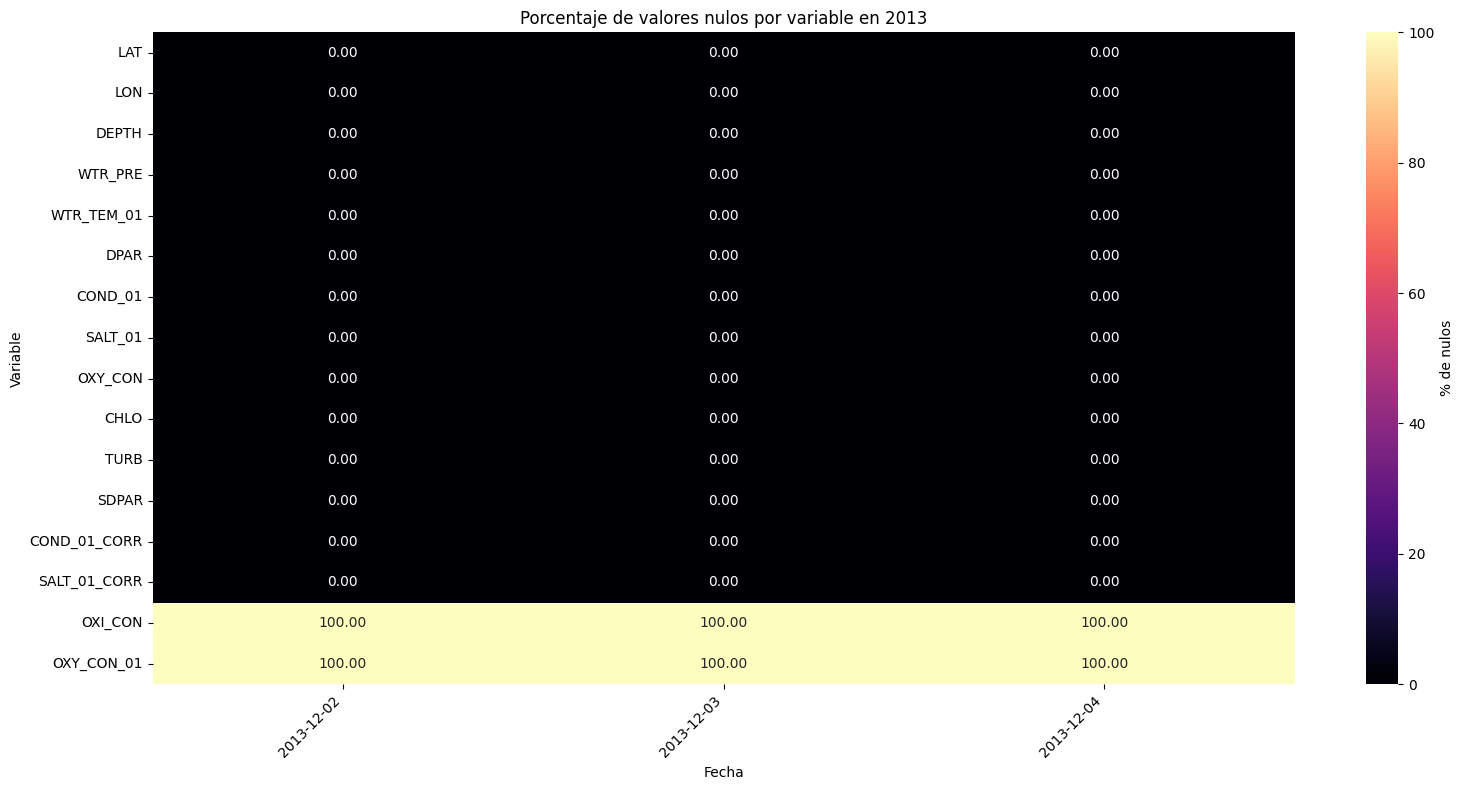

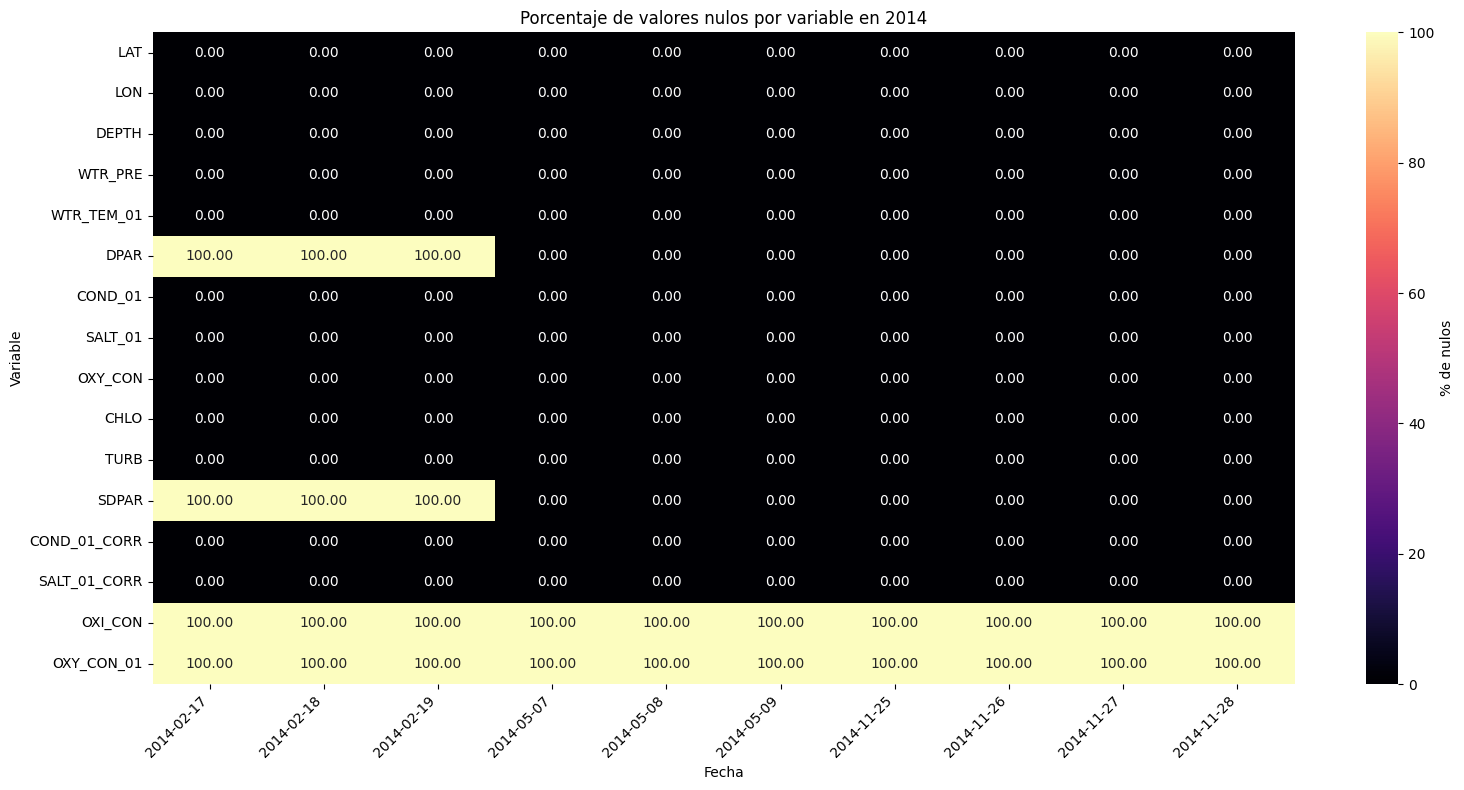

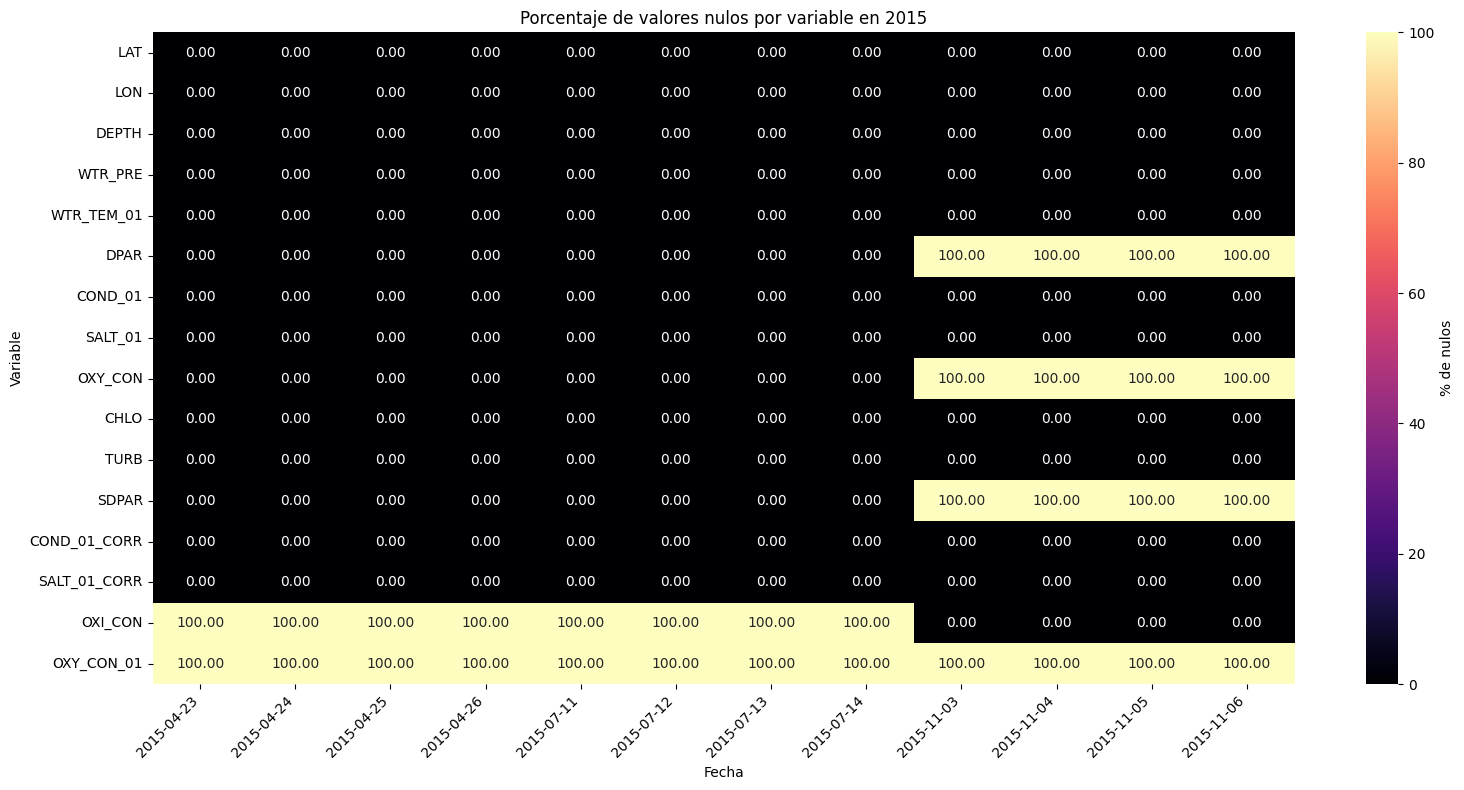

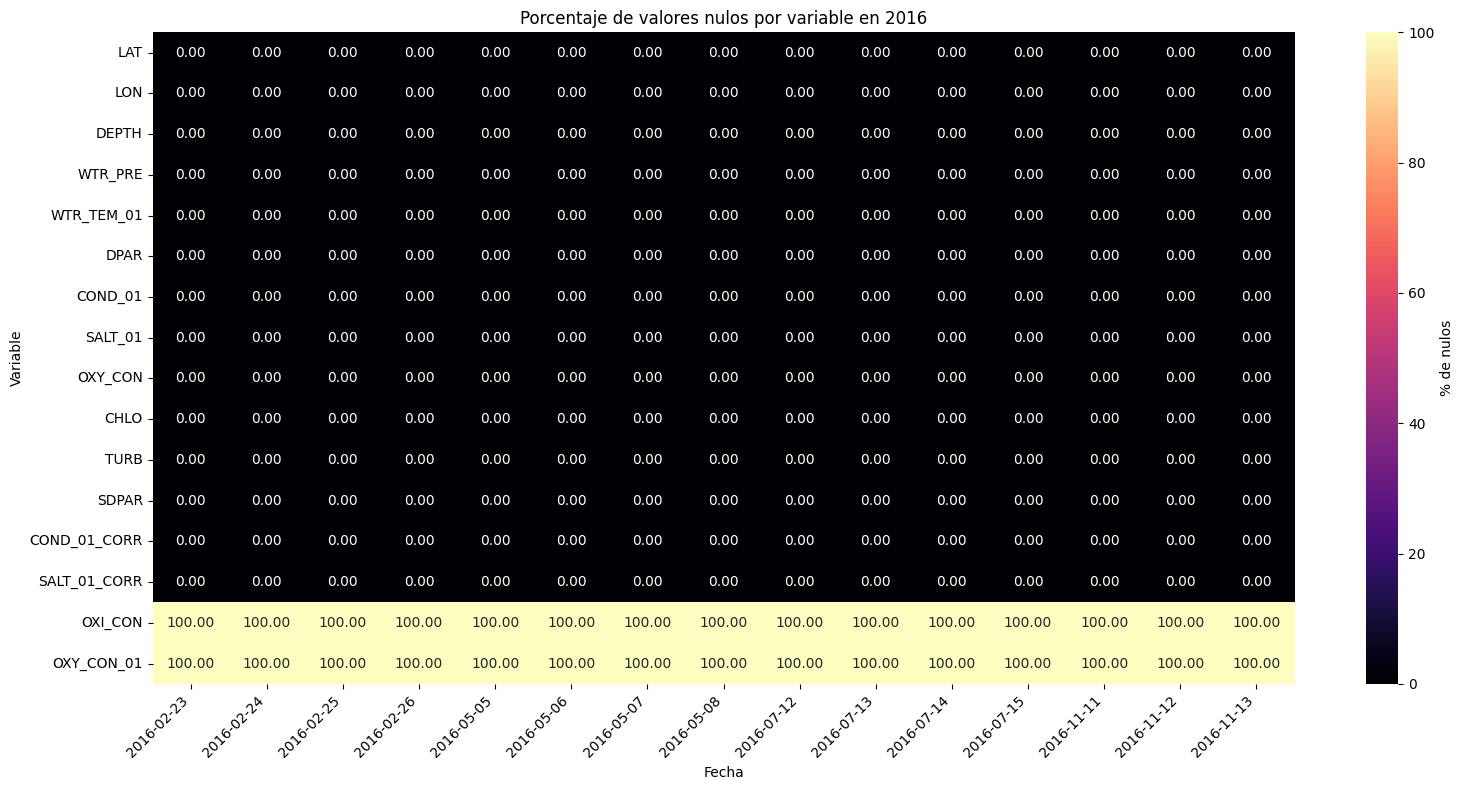

No hay datos para el año 2017


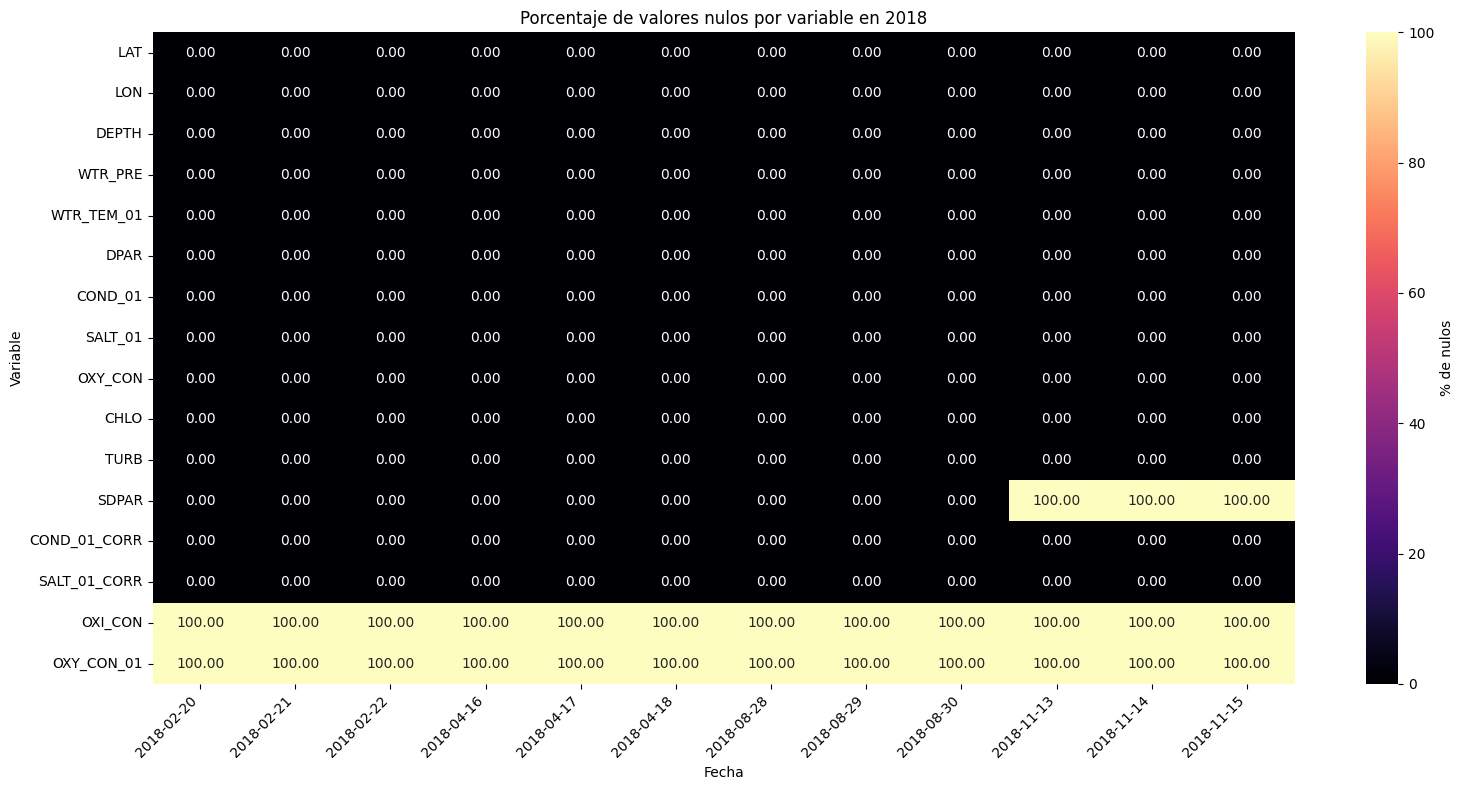

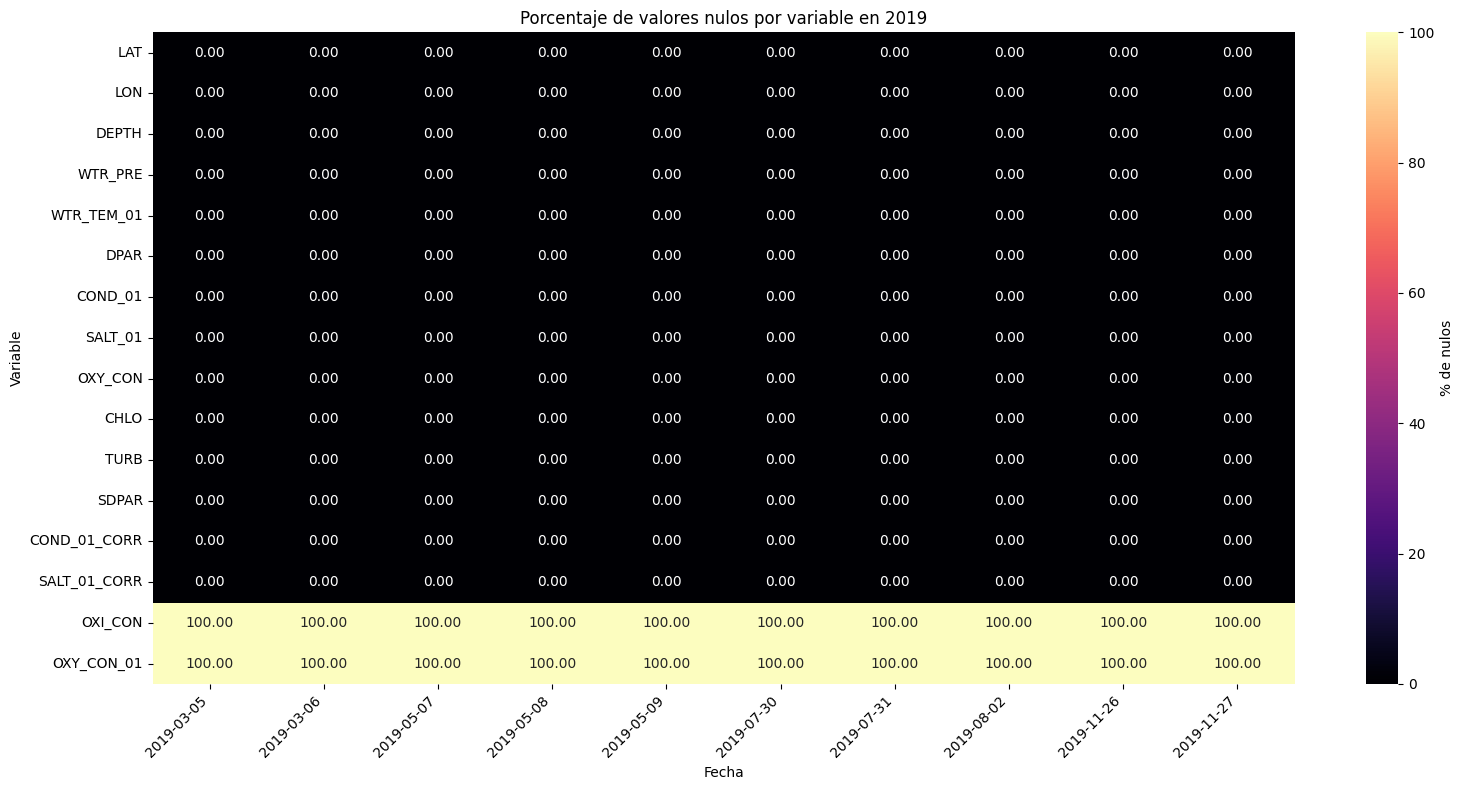

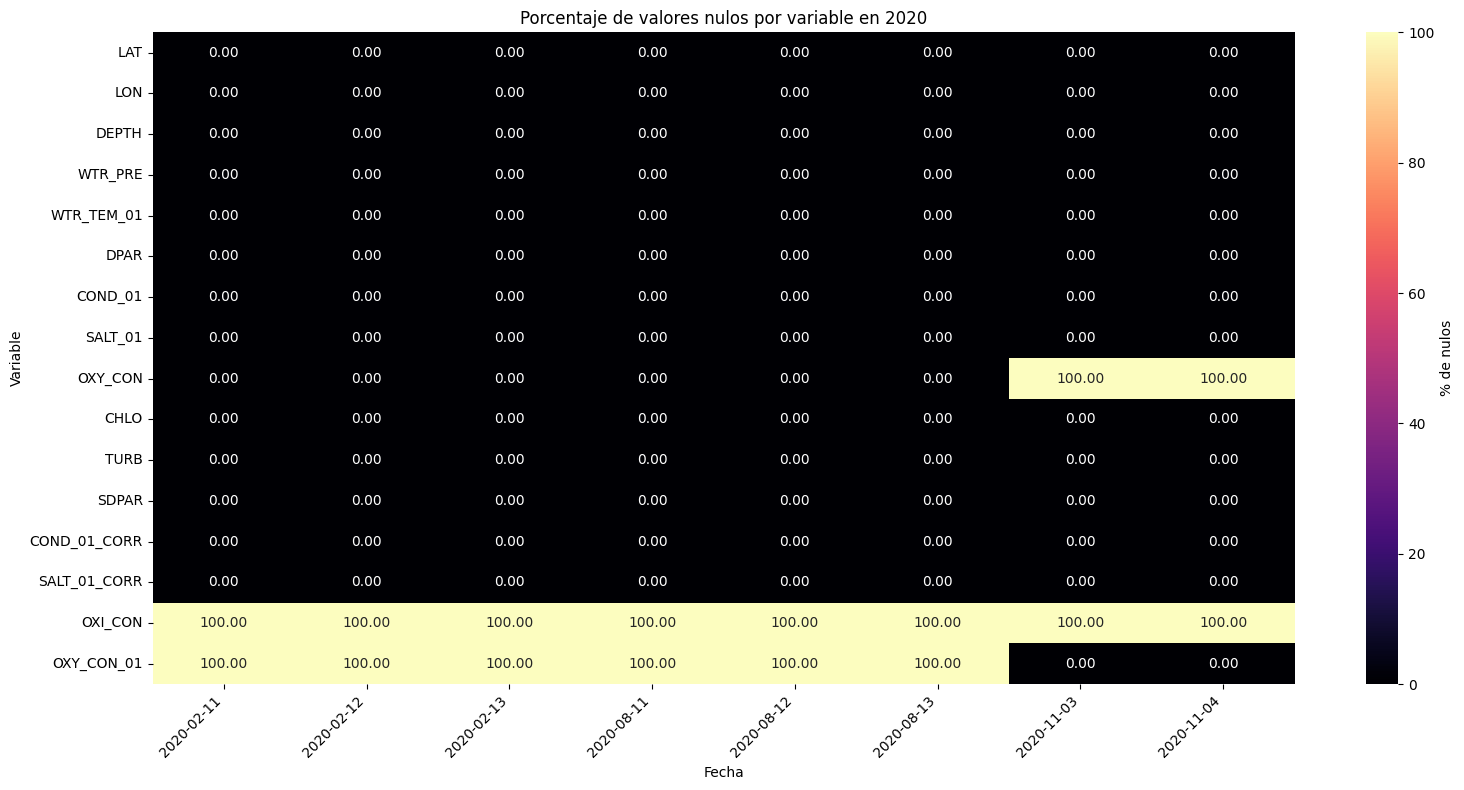

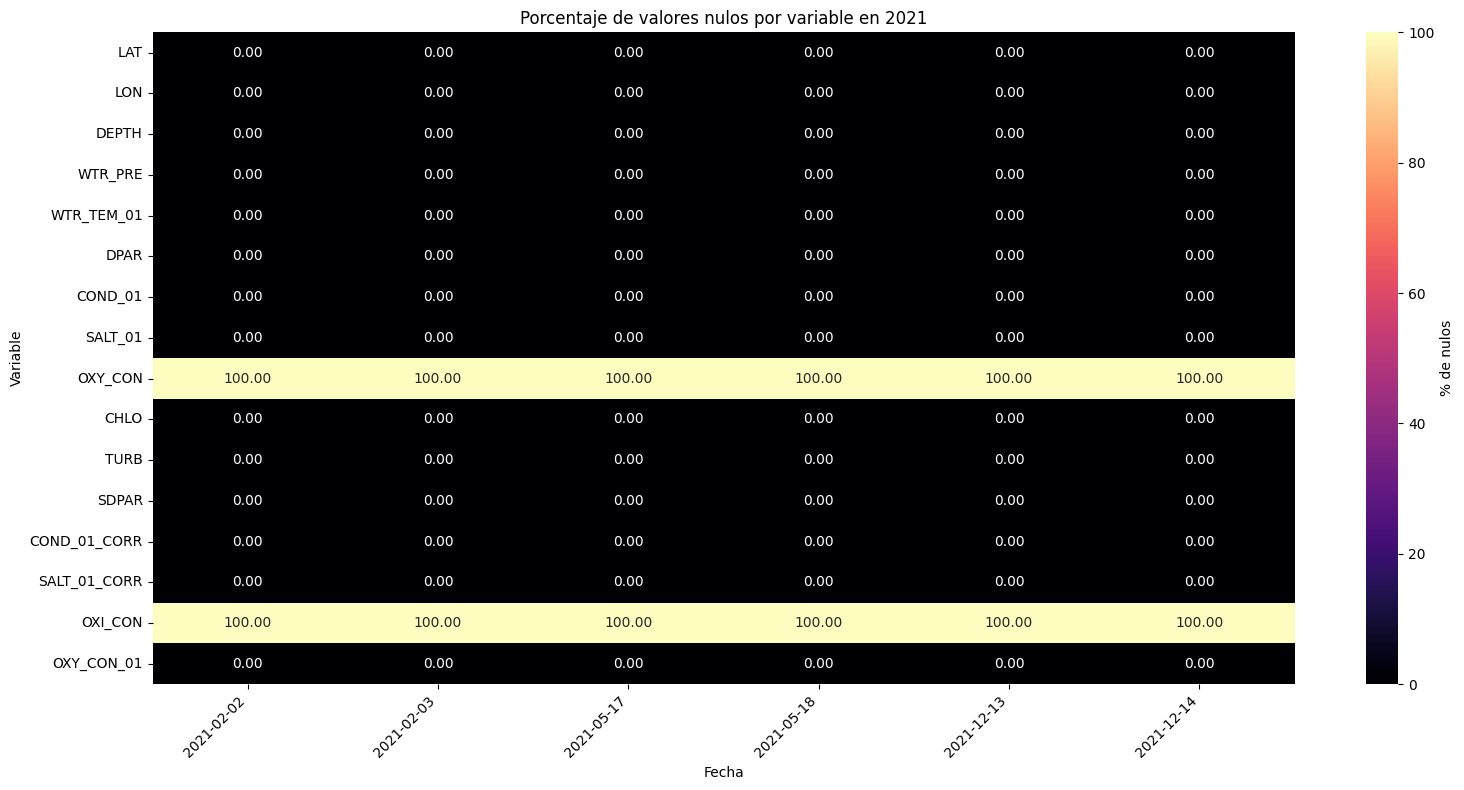

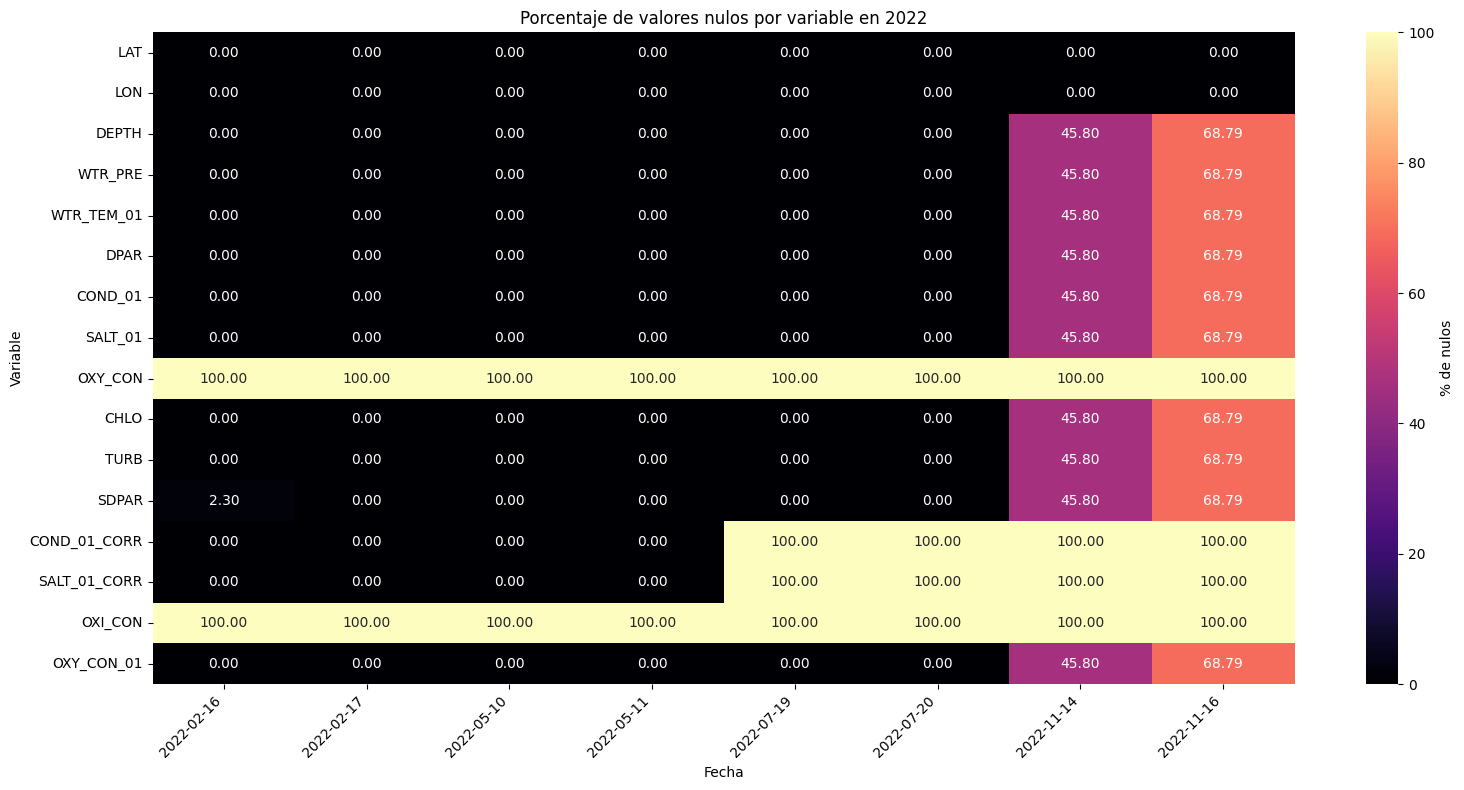

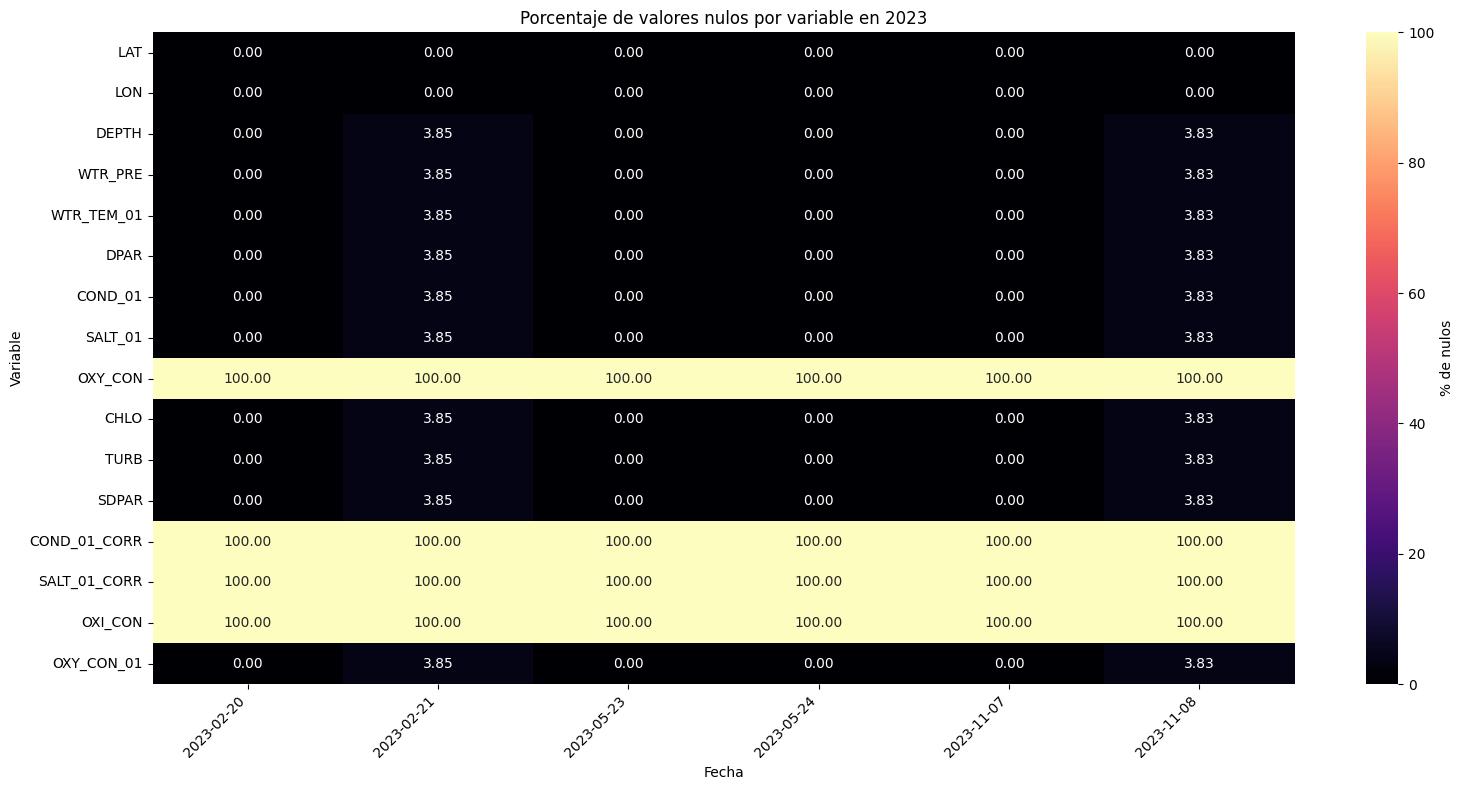

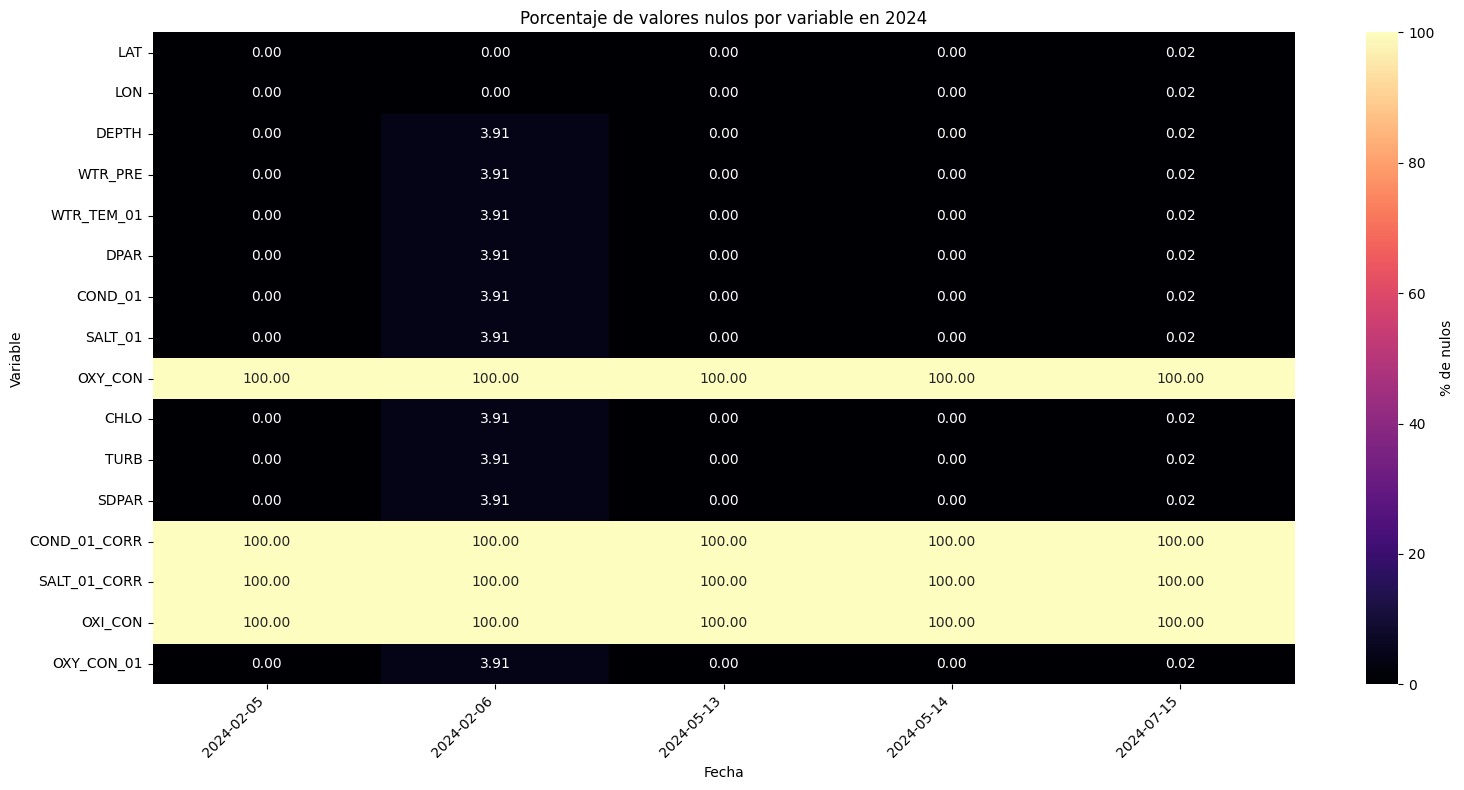

In [ ]:
cols_con_nulos = df_clean.columns[df_clean.isnull().any()].tolist()
total_por_fecha = df_clean.groupby('DATE').size()

# Número de nulos por fecha y por variable
nulos_por_fecha = df_clean.groupby('DATE')[cols_con_nulos].apply(lambda x: x.isnull().sum())

# Porcentaje de nulos por columna (por fecha)
porcentaje_nulos = nulos_por_fecha.div(total_por_fecha, axis=0) * 100


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


porcentaje_nulos.index = pd.to_datetime(porcentaje_nulos.index)


años = list(range(2013, 2025, 1))

for año in años:

    mask = porcentaje_nulos.index.year == año
    subset = porcentaje_nulos[mask]

    if subset.empty:
        print(f"No hay datos para el año {año}")
        continue

    subset_rounded = subset.round(2)

    plt.figure(figsize=(16, 8))

    ax = sns.heatmap(
        subset_rounded.T,
        annot=True,
        fmt=".2f",
        cmap="magma",
        cbar_kws={"label": "% de nulos"}
    )

    # Formatear las etiquetas del eje X
    ax.set_xticklabels(
        [label.get_text()[:10] for label in ax.get_xticklabels()],
        rotation=45,
        ha="right"
    )
    plt.title(f"Porcentaje de valores nulos por variable en {año}")
    plt.xlabel("Fecha")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

In [ ]:
df_clean = df_clean.drop(columns = 'depth')

In [ ]:
print(df_clean.columns.tolist())
df = df_clean.copy()

['LAT', 'LON', 'DEPTH', 'WTR_PRE', 'WTR_TEM_01', 'DPAR', 'COND_01', 'SALT_01', 'OXY_CON', 'CHLO', 'TURB', 'SDPAR', 'COND_01_CORR', 'SALT_01_CORR', 'OXI_CON', 'OXY_CON_01', 'DATE']


In [ ]:
print(f"Forma: {df.shape}")
print("\nColumnas:\n", df.columns.tolist())

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos:")
print(df.isnull().sum())

Forma: (192151, 17)

Columnas:
 ['LAT', 'LON', 'DEPTH', 'WTR_PRE', 'WTR_TEM_01', 'DPAR', 'COND_01', 'SALT_01', 'OXY_CON', 'CHLO', 'TURB', 'SDPAR', 'COND_01_CORR', 'SALT_01_CORR', 'OXI_CON', 'OXY_CON_01', 'DATE']

Tipos de datos:
LAT             float64
LON             float64
DEPTH           float64
WTR_PRE         float64
WTR_TEM_01      float64
DPAR            float64
COND_01         float64
SALT_01         float64
OXY_CON         float64
CHLO            float64
TURB            float64
SDPAR           float64
COND_01_CORR    float64
SALT_01_CORR    float64
OXI_CON         float64
OXY_CON_01      float64
DATE             object
dtype: object

Valores nulos:
LAT                  1
LON                  1
DEPTH            22153
WTR_PRE          22153
WTR_TEM_01       22153
DPAR             26875
COND_01          22153
SALT_01          22153
OXY_CON         135292
CHLO             22153
TURB             22153
SDPAR            28801
COND_01_CORR    116873
SALT_01_CORR    116873
OXI_CON    

Tenemos un duplicado de columnas oxi_con y oxy_con y oxy_con_01 debido a distinto nombre en distinto csv. Juntamos esos datos en una única columna OXI_CON.

In [ ]:
# crear columna combinada OXI_CON unificando todas las versiones
df['OXI_CON'] = df['OXI_CON'].combine_first(df.get('OXY_CON')).combine_first(df.get('OXY_CON_01'))

# Eliminar las columnas redundantes si existen
for col in ['OXY_CON', 'OXY_CON_01']:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

# valores nulos que quedan en la columna final
print(df[['OXI_CON']].isnull().sum())


OXI_CON    22153
dtype: int64


Combinar valores corregidos y no corregidos si no existen corregidos en una unica columna para COND y para SALT

In [ ]:
# Crear la columna combinada
df['COND'] = df.get('COND_01_CORR').combine_first(df.get('COND_01'))

# Eliminar columnas originales si existen
for col in ['COND_01', 'COND_01_CORR']:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

print(df[['COND']].isnull().sum())

COND    22153
dtype: int64


In [ ]:
# Crear la columna combinada
df['SALT'] = df.get('SALT_01_CORR').combine_first(df.get('SALT_01'))

# Eliminar columnas originales si existen
for col in ['SALT_01', 'SALT_01_CORR']:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

print(df[['SALT']].isnull().sum())

SALT    22153
dtype: int64


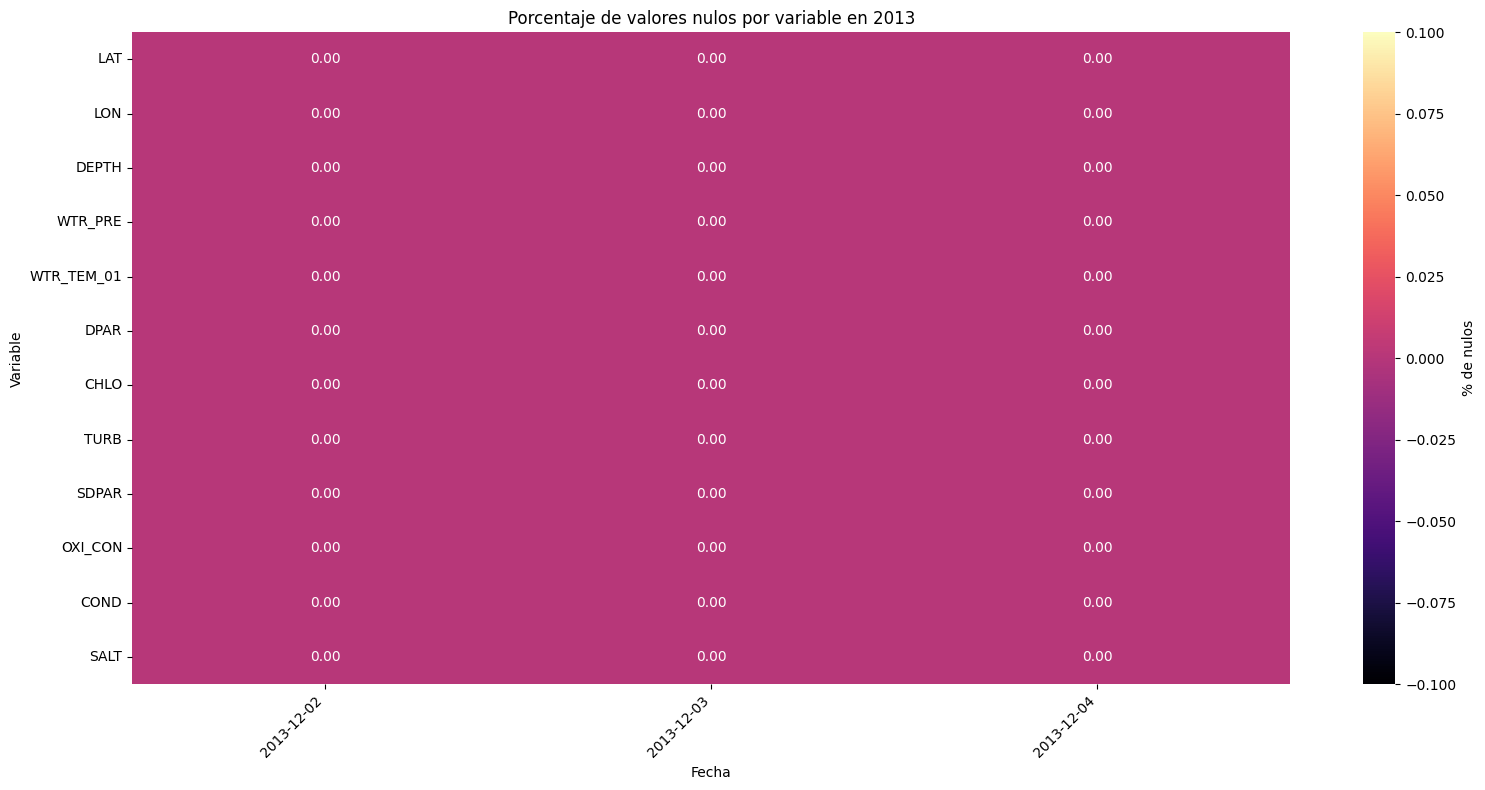

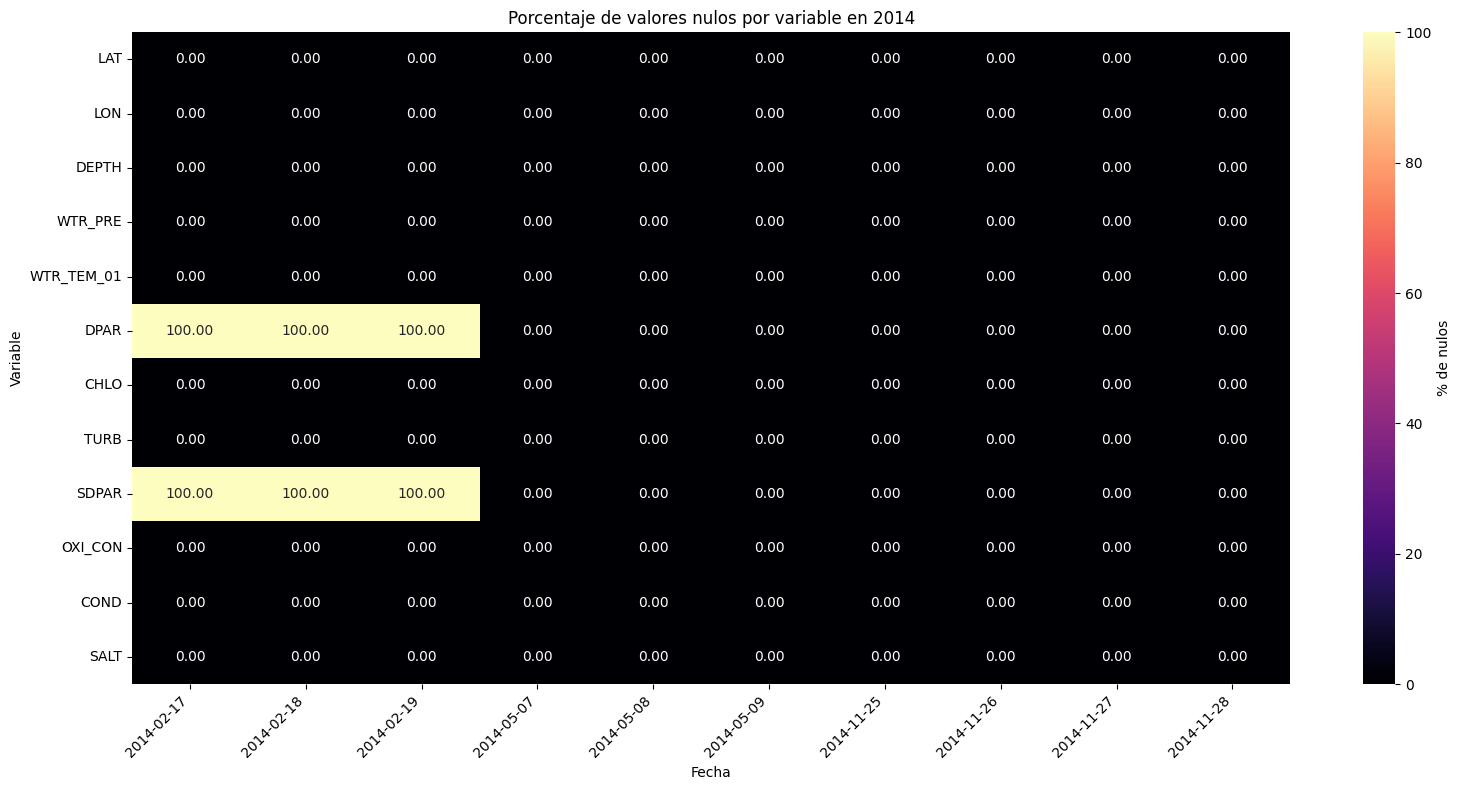

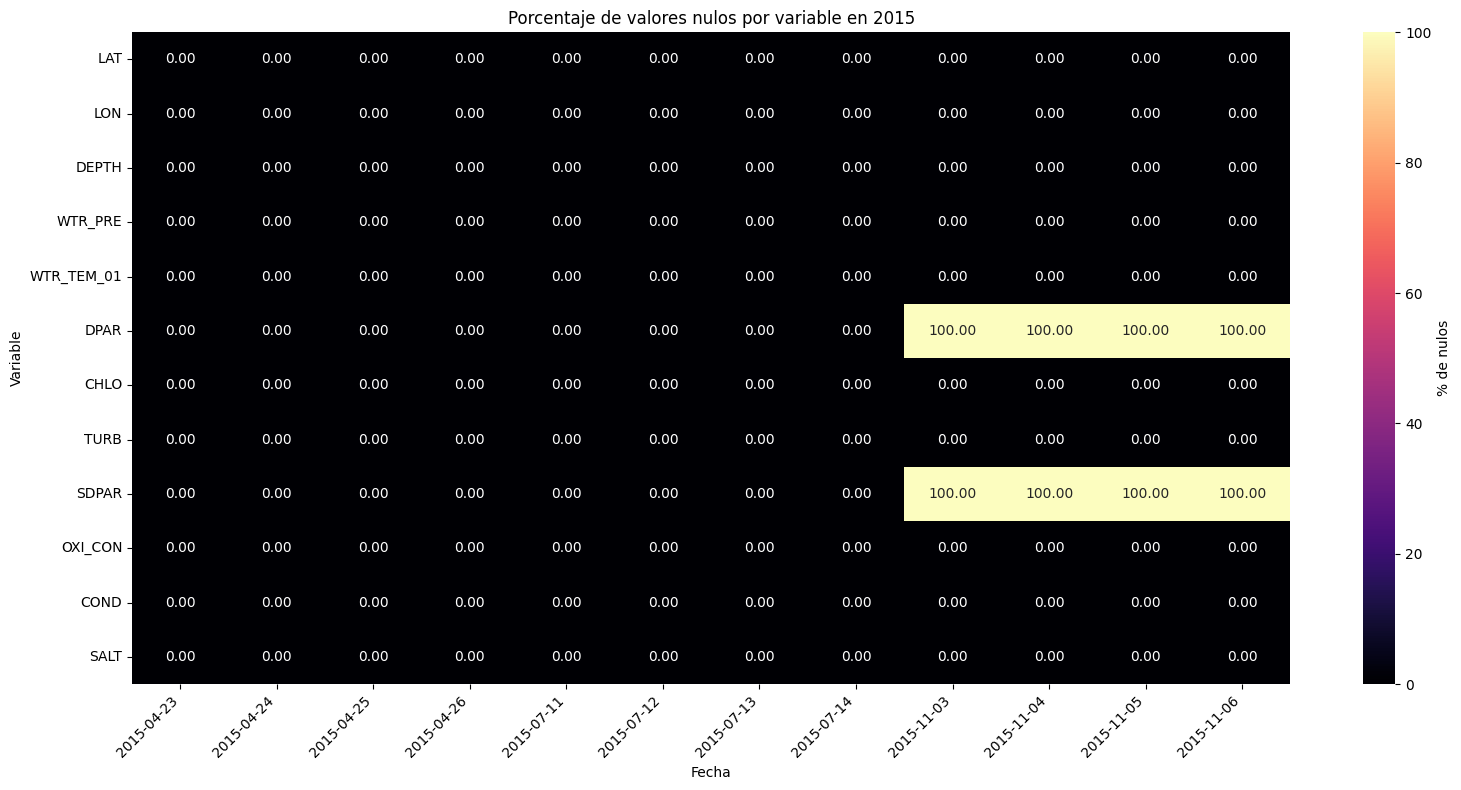

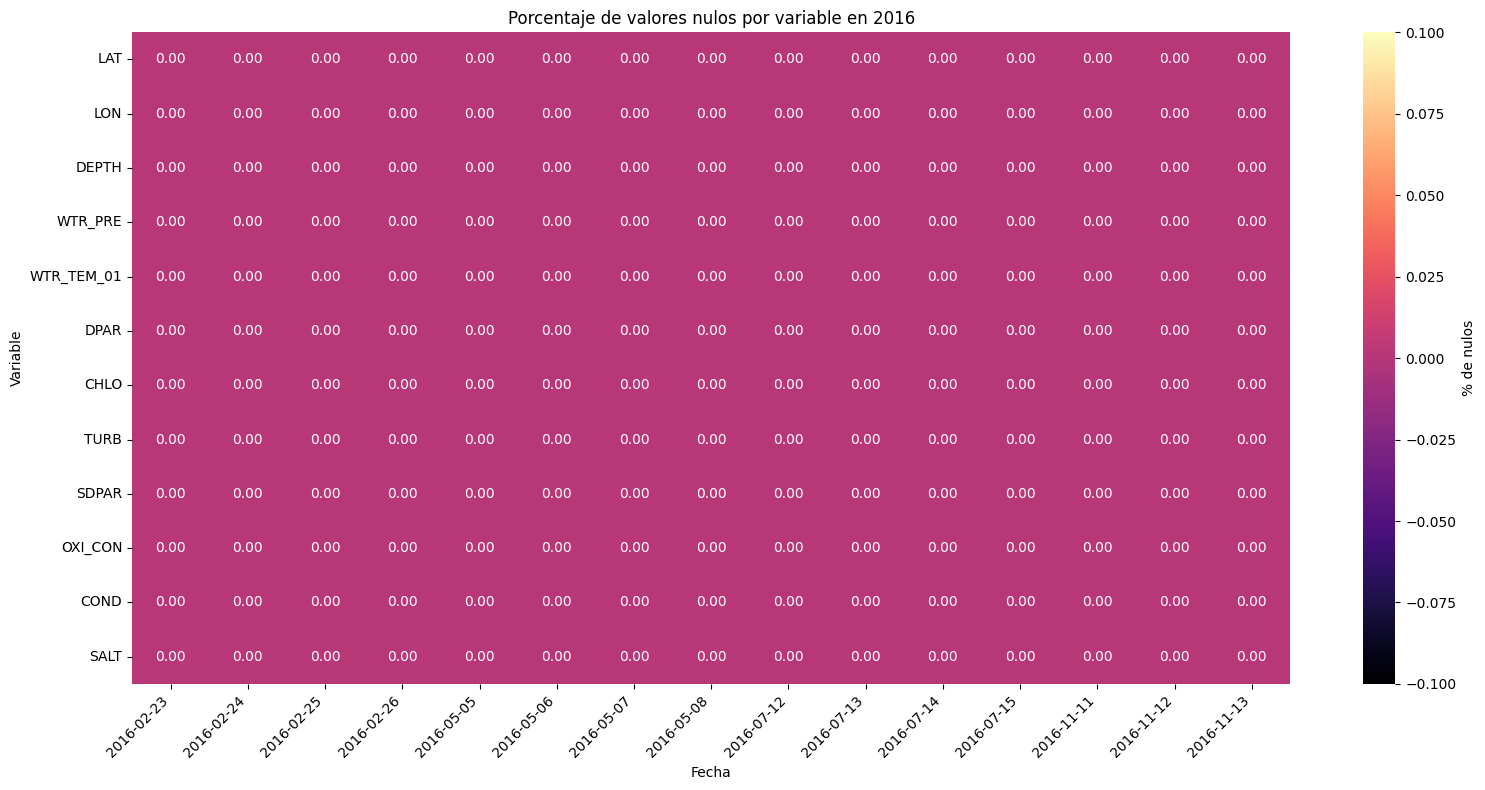

No hay datos para el año 2017


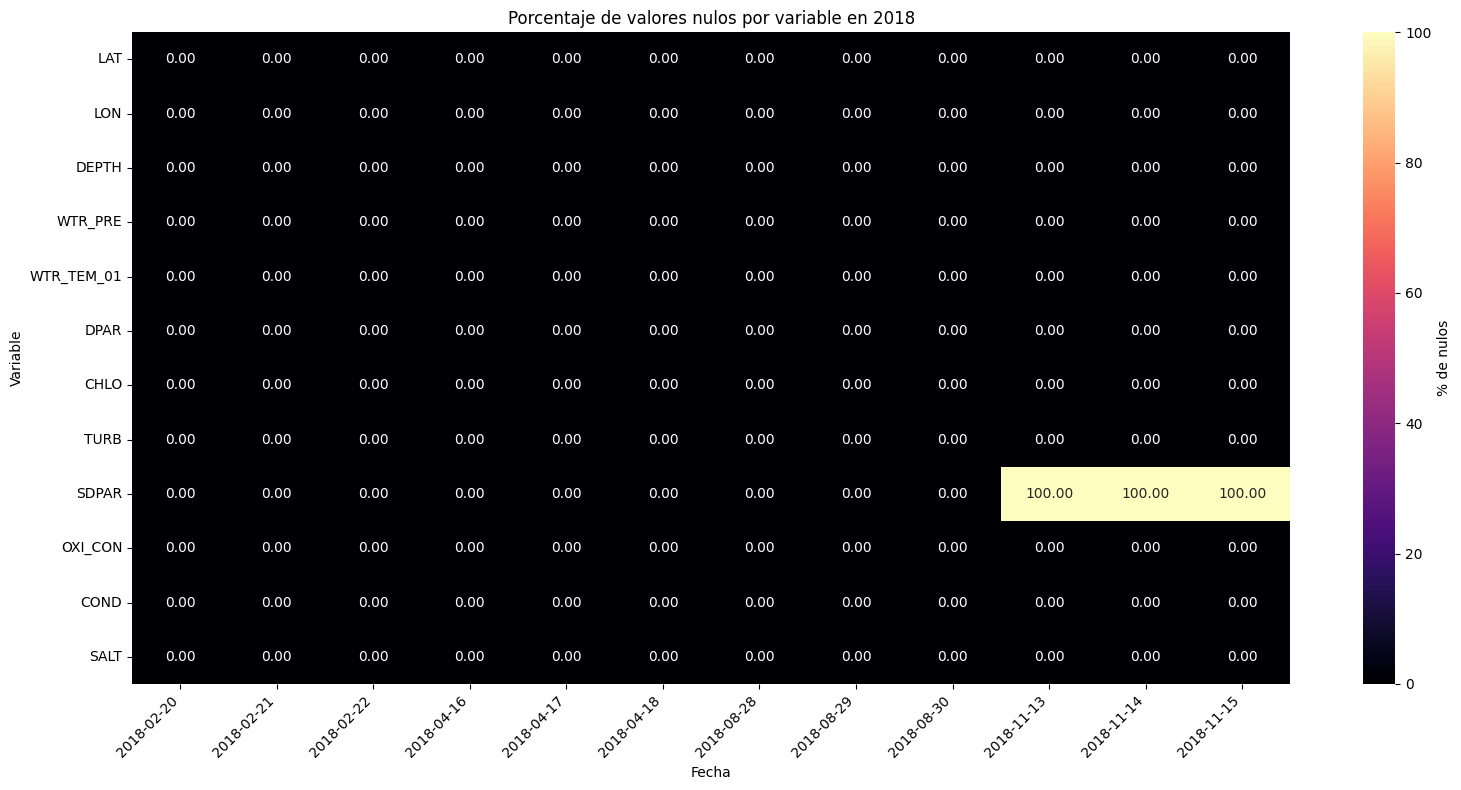

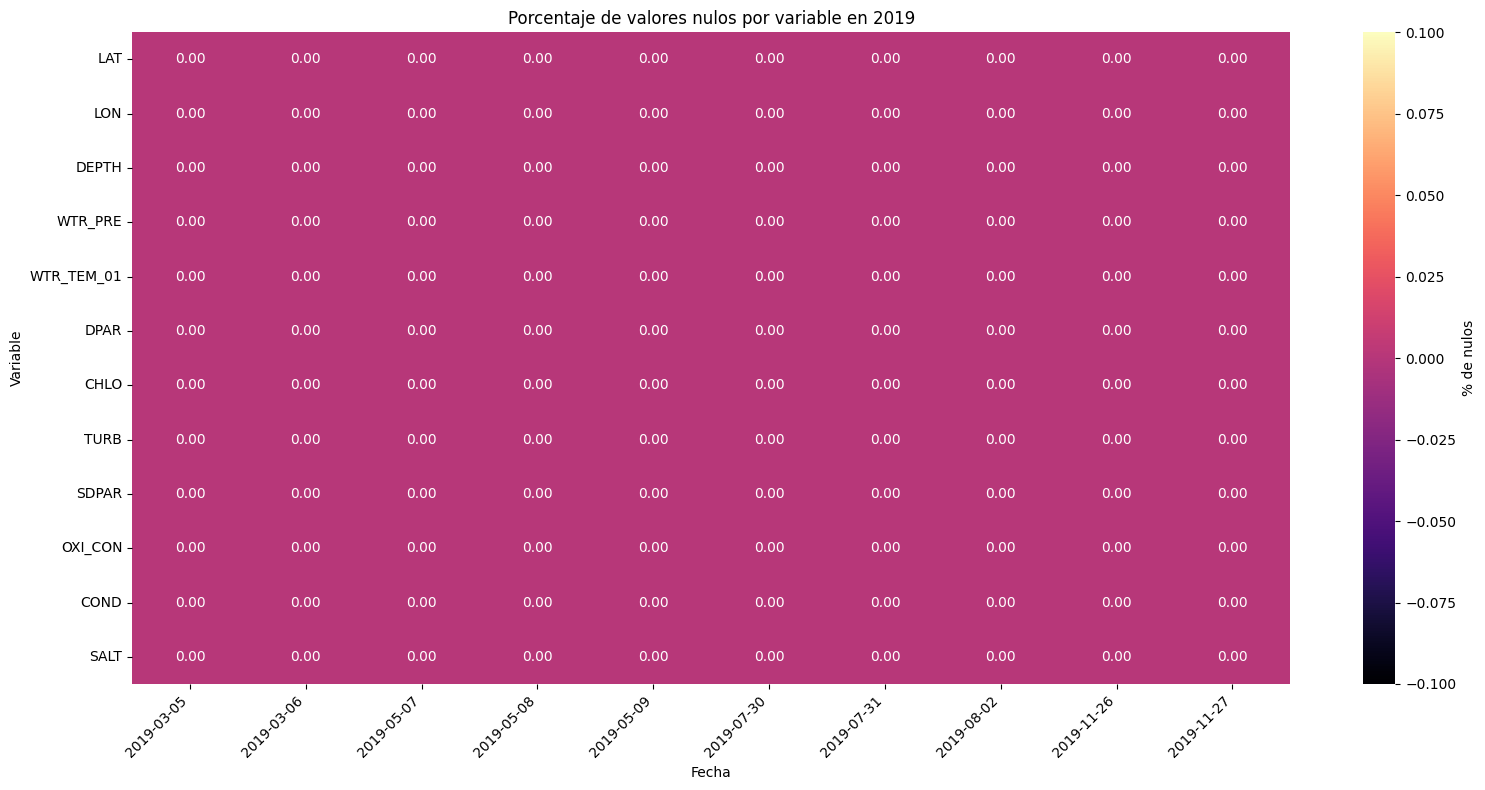

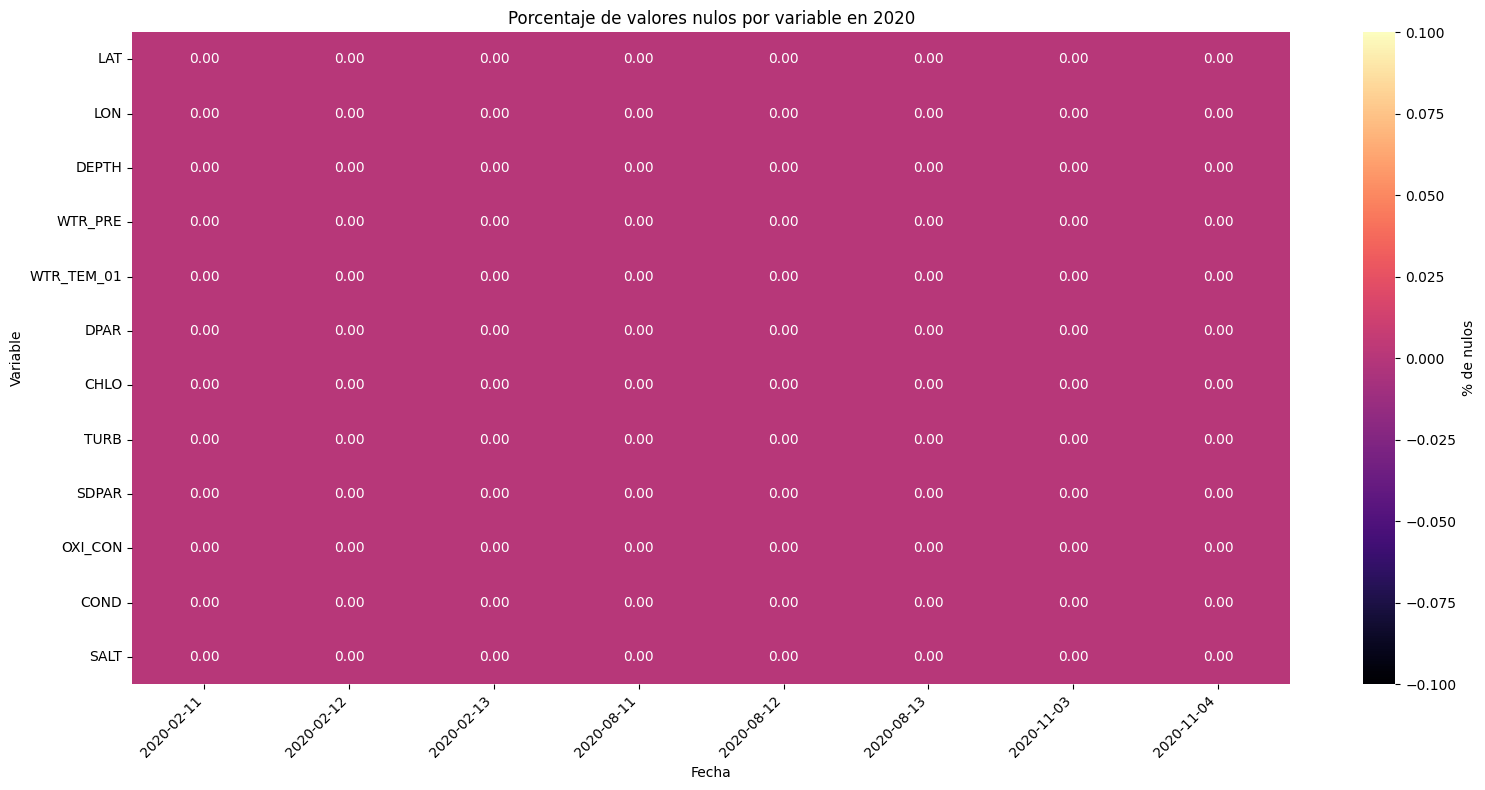

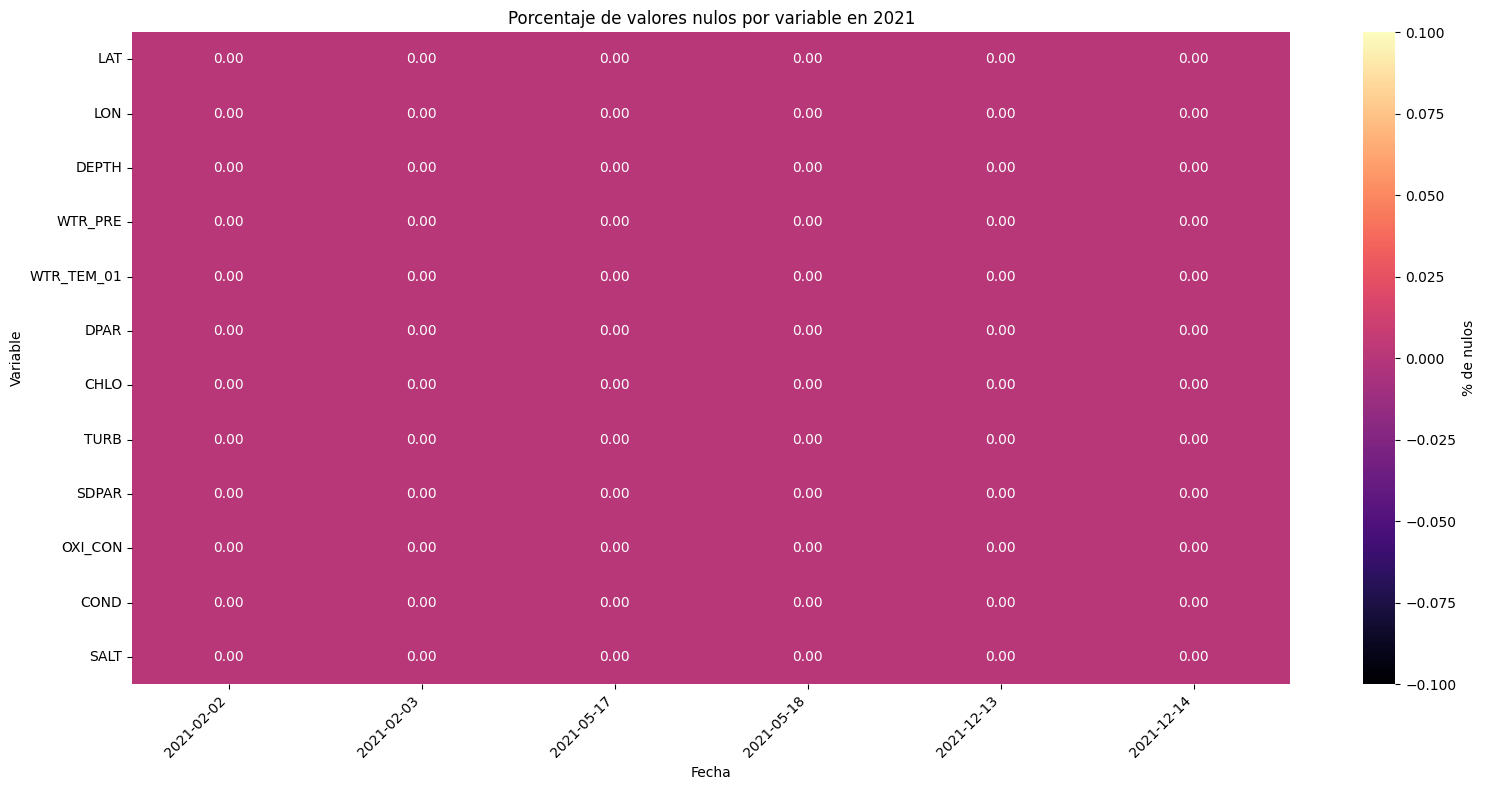

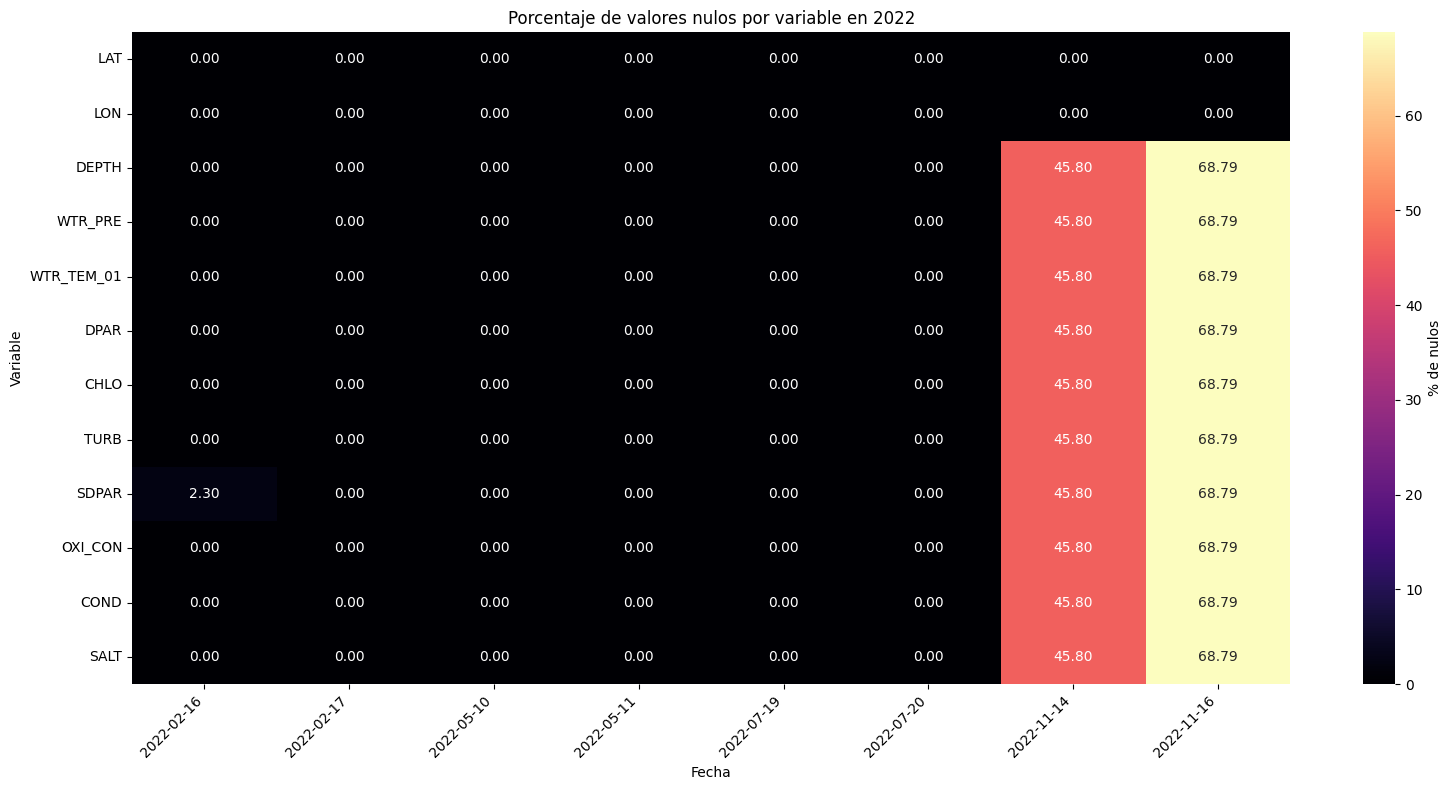

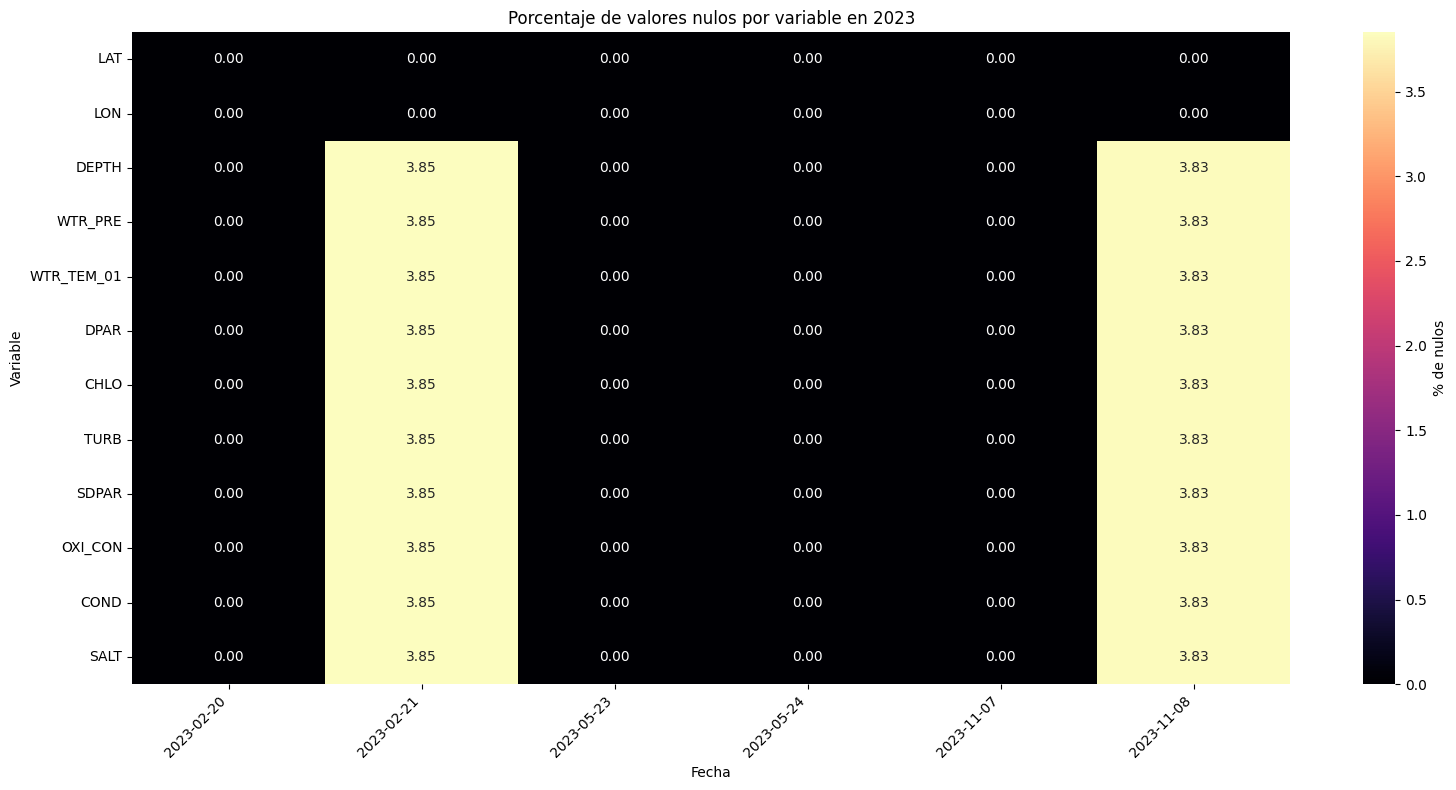

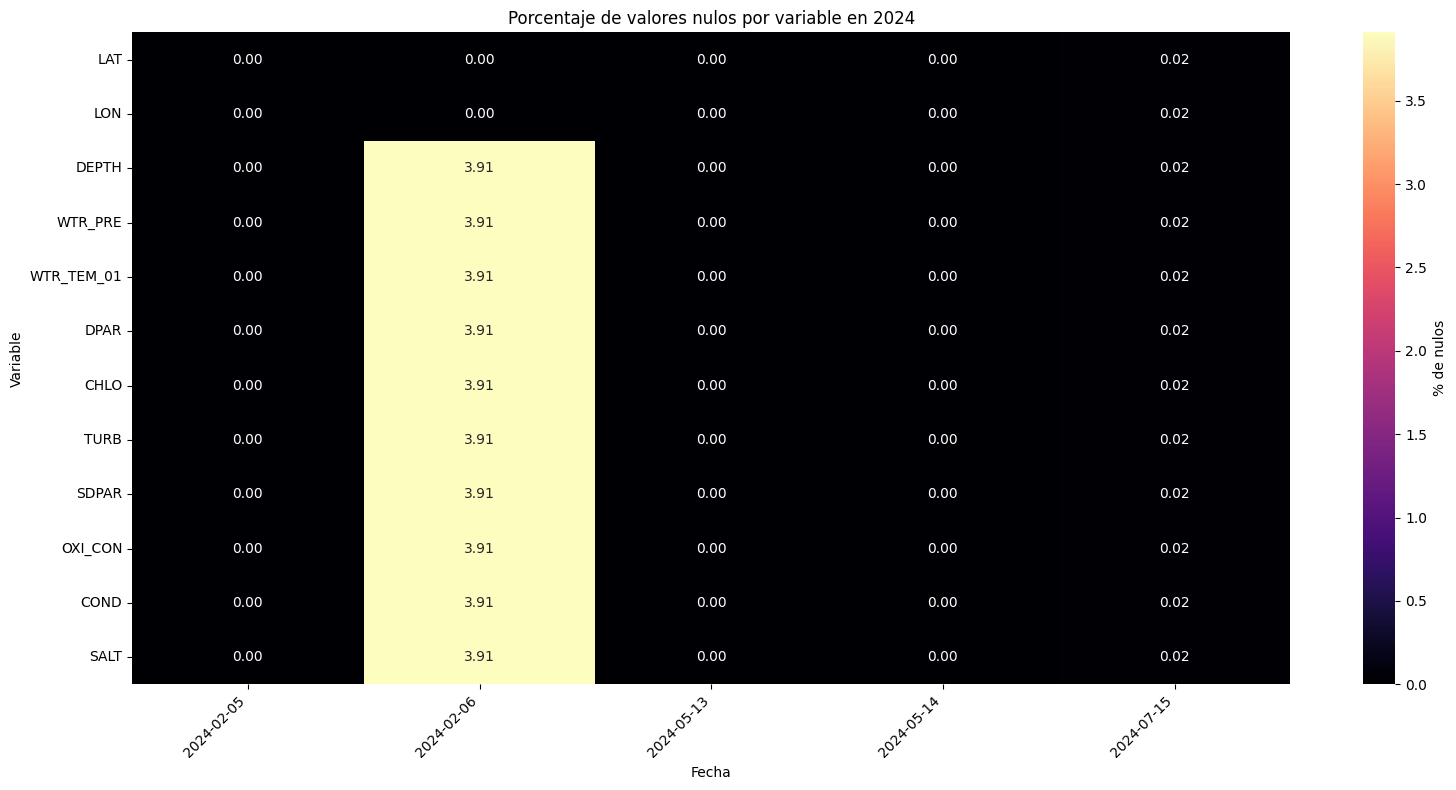

In [ ]:
cols_con_nulos = df.columns[df.isnull().any()].tolist()

total_por_fecha = df.groupby('DATE').size()

# Número de nulos por fecha y por variable
nulos_por_fecha = df.groupby('DATE')[cols_con_nulos].apply(lambda x: x.isnull().sum())

# porcentaje de nulos por columna (por fecha)
porcentaje_nulos = nulos_por_fecha.div(total_por_fecha, axis=0) * 100


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


porcentaje_nulos.index = pd.to_datetime(porcentaje_nulos.index)


años = list(range(2013, 2025, 1))

for año in años:

    mask = porcentaje_nulos.index.year == año
    subset = porcentaje_nulos[mask]

    if subset.empty:
        print(f"No hay datos para el año {año}")
        continue

    subset_rounded = subset.round(2)

    plt.figure(figsize=(16, 8))

    ax = sns.heatmap(
        subset_rounded.T,
        annot=True,
        fmt=".2f",
        cmap="magma",
        cbar_kws={"label": "% de nulos"}
    )

    # Formatear las etiquetas del eje X
    ax.set_xticklabels(
        [label.get_text()[:10] for label in ax.get_xticklabels()],
        rotation=45,
        ha="right"
    )
    plt.title(f"Porcentaje de valores nulos por variable en {año}")
    plt.xlabel("Fecha")
    plt.ylabel("Variable")
    plt.tight_layout()
    plt.show()

In [ ]:
conteo_fechas = df['DATE'].value_counts().sort_index()
print(conteo_fechas.tail(25))

DATE
2021-02-02      593
2021-02-03      957
2021-05-17      552
2021-05-18      707
2021-12-13      576
2021-12-14      952
2022-02-16     3912
2022-02-17     5716
2022-05-10      254
2022-05-11      873
2022-07-19      538
2022-07-20      898
2022-11-14    17217
2022-11-16    19130
2023-02-20     6010
2023-02-21     9590
2023-05-23     5958
2023-05-24     6805
2023-11-07     5999
2023-11-08     9635
2024-02-05     5806
2024-02-06     9437
2024-05-13     5987
2024-05-14     9565
2024-07-15     4298
Name: count, dtype: int64


In [ ]:
columns_to_check = [col for col in df.columns if col not in ['SDPAR', 'DPAR']]

# eliminar filas con NaN en cualquier columna excepto 'SDPAR' y 'DPAR'
df_clean= df.dropna(subset=columns_to_check)


print(f"Filas eliminadas: {len(df) - len(df_clean)}")
print(f"Nuevo tamaño del DataFrame: {df_clean.shape}")

Filas eliminadas: 22153
Nuevo tamaño del DataFrame: (169998, 13)


# Exploracion de variables y eliminación de valores anómalos

In [ ]:
datos = df_clean.copy()
print(datos.describe())

                 LAT            LON          DEPTH        WTR_PRE  \
count  169998.000000  169998.000000  169998.000000  169998.000000   
mean       38.658909       1.174598     309.432765     315.473333   
std         4.035239       0.641732     237.304905     239.037925   
min         0.000000       0.145000       0.000000       0.000000   
25%        38.999670       0.607200      96.000000     100.500000   
50%        39.000170       0.865000     265.000000     271.500000   
75%        39.228830       1.892300     478.000000     485.000000   
max        39.501500       2.701000     980.000000     990.000000   

          WTR_TEM_01           DPAR           CHLO           TURB  \
count  169998.000000  165276.000000  169998.000000  169998.000000   
mean       14.225064     748.442593       0.150922       3.628828   
std         2.064081    2611.207363       0.511898      34.341974   
min         0.000000     -28.760000      -0.096100    -217.966000   
25%        13.453500       0.0058

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


Eliminacion de valores negativos

In [ ]:
columnas_excluir = ['SDPAR','DATE', 'DPAR']

# máscara que marca las filas con valores negativos, excluyendo la columna DATE
mask = (datos.drop(columns=columnas_excluir) >= 0).all(axis=1)

datos_sin_negativos = datos[mask]
print(f"Filas eliminadas: {len(datos) - len(datos_sin_negativos)}")

Filas eliminadas: 1627


In [ ]:
print(datos_sin_negativos.describe())

                LAT            LON          DEPTH        WTR_PRE  \
count  168371.00000  168371.000000  168371.000000  168371.000000   
mean       38.65555       1.175908     308.491042     314.555088   
std         4.05451       0.642453     237.409577     239.151402   
min         0.00000       0.145000       0.000000       0.000000   
25%        38.99967       0.607200      94.000000     100.000000   
50%        39.00017       0.865000     263.000000     270.000000   
75%        39.22883       1.892300     477.000000     485.000000   
max        39.50150       2.701000     980.000000     990.000000   

          WTR_TEM_01           DPAR           CHLO           TURB  \
count  168371.000000  165251.000000  168371.000000  168371.000000   
mean       14.234331     748.537493       0.153108       3.665446   
std         2.070972    2611.392053       0.513875      34.499934   
min         0.000000     -28.760000       0.000000       0.000000   
25%        13.458600       0.005840       

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


/tmp/ipython-input-4120609475.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_sin_negativos, x=col, palette='Set2')


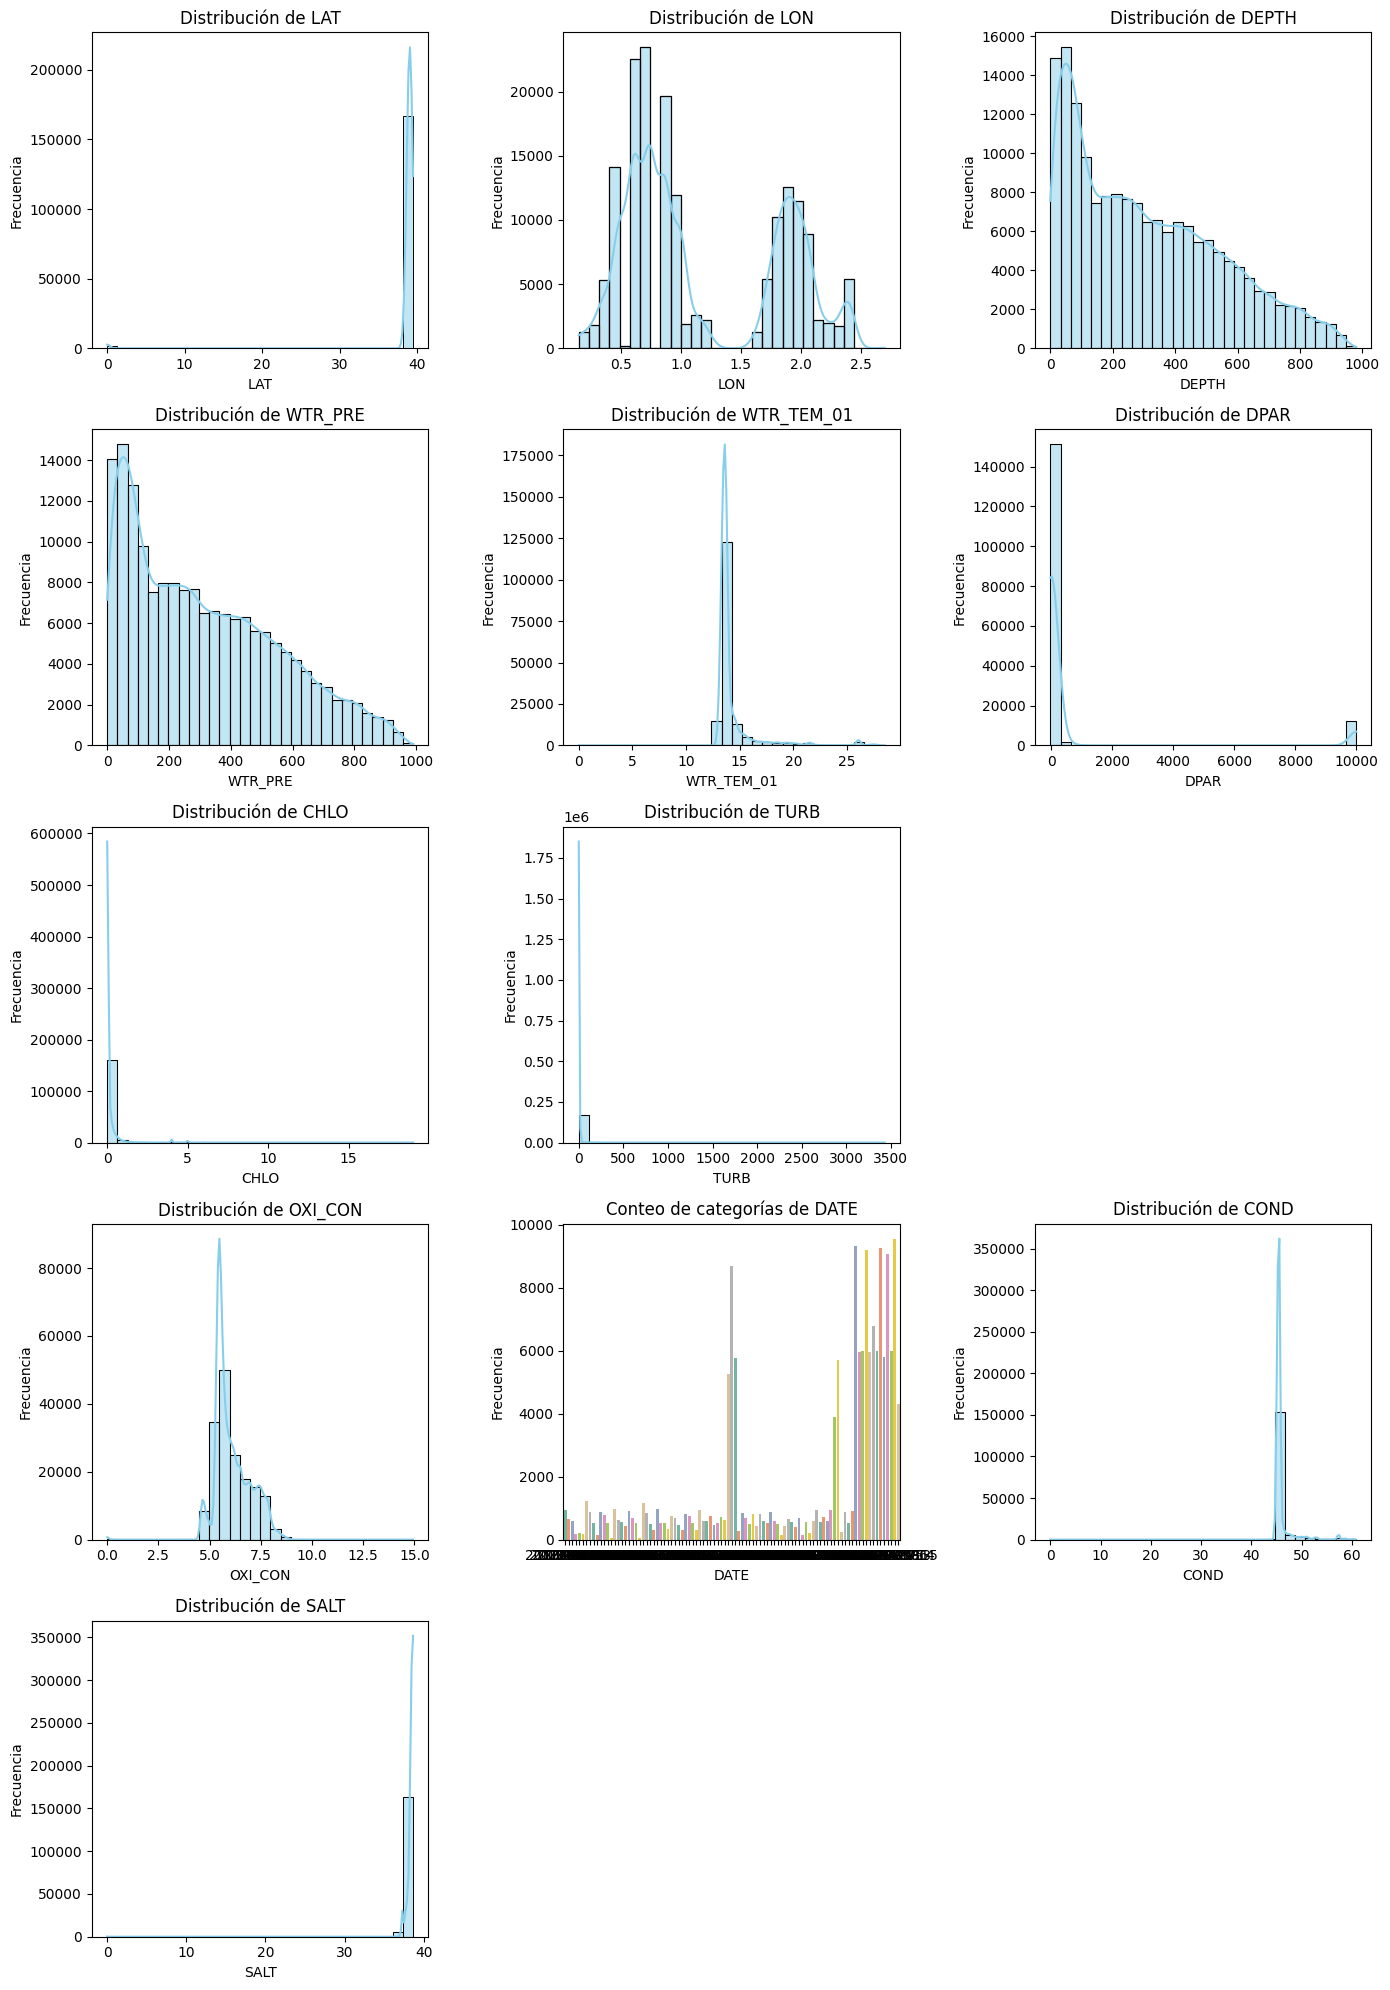

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = len(datos_sin_negativos.columns)
n_rows = (n_cols // 3) + 1


plt.figure(figsize=(14, 4 * n_rows))


for i, col in enumerate(datos_sin_negativos.columns):
    if col in ['SDPAR']:  # Omitir la columna SDPAR
        continue

    plt.subplot(n_rows, 3, i + 1)

    if datos_sin_negativos[col].dtype in ['float64', 'int64']:
        sns.histplot(datos_sin_negativos[col].dropna(), kde=True, color='skyblue', bins=30)
        plt.title(f"Distribución de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
    else:  # variables categoricas
        sns.countplot(data=datos_sin_negativos, x=col, palette='Set2')
        plt.title(f"Conteo de categorías de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")

    plt.tight_layout()

plt.show()


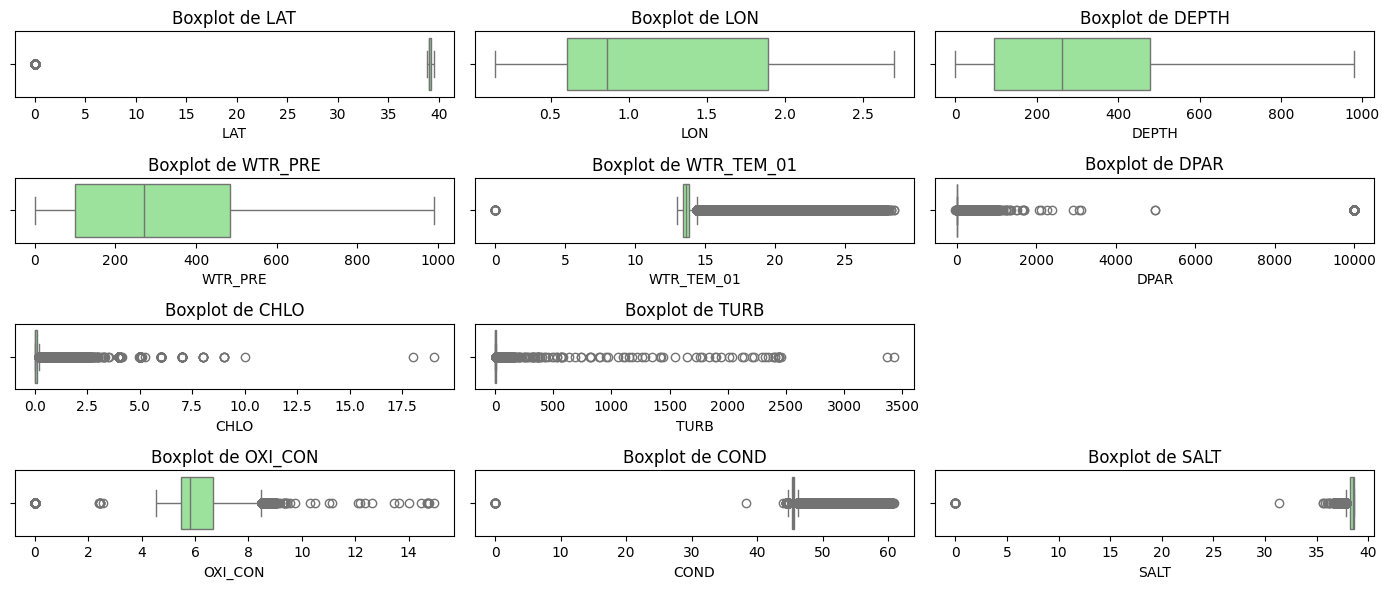

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 6))


for i, col in enumerate(datos_sin_negativos.select_dtypes(include=['float64', 'int64']).columns):
    if col in ['SDPAR', 'SDPAR_cor']:  # Omitir las columnas SDPAR y SDPAR_cor
        continue

    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=datos_sin_negativos, x=col, color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

Eliminacion de datos anómalo: Latitud = 0 y temperatura = 0.

In [ ]:
datos_sin_negativos = datos_sin_negativos[
    (datos_sin_negativos['LAT'] != 0) &
    (datos_sin_negativos['WTR_TEM_01'] != 0)
]

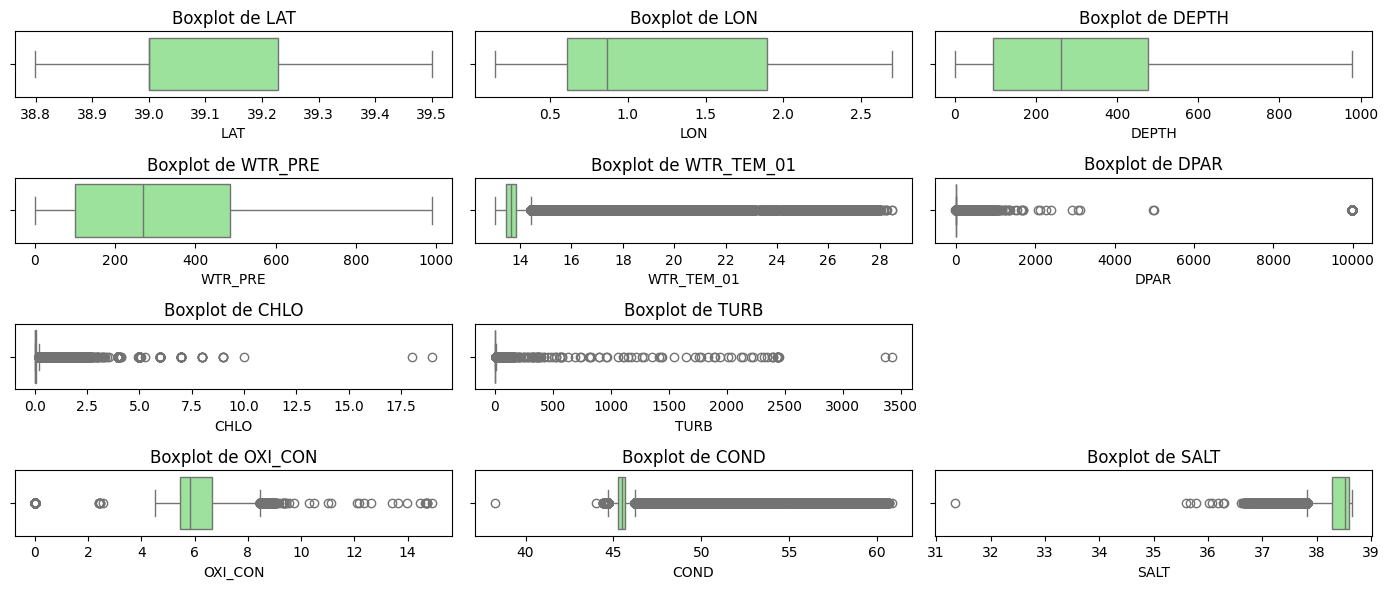

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 6))


for i, col in enumerate(datos_sin_negativos.select_dtypes(include=['float64', 'int64']).columns):
    if col in ['SDPAR', 'SDPAR_cor']:
        continue

    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=datos_sin_negativos, x=col, color='lightgreen')
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

In [ ]:
print(datos_sin_negativos.describe())

                 LAT            LON          DEPTH        WTR_PRE  \
count  166512.000000  166512.000000  166512.000000  166512.000000   
mean       39.080084       1.178815     308.391045     314.491179   
std         0.170544       0.643168     237.291113     239.026966   
min        38.798170       0.145000       0.000000       0.333000   
25%        38.999670       0.607200      94.000000     100.000000   
50%        39.000170       0.865300     263.000000     270.000000   
75%        39.229000       1.892300     477.000000     485.000000   
max        39.501500       2.701000     980.000000     990.000000   

          WTR_TEM_01           DPAR           CHLO           TURB  \
count  166512.000000  163392.000000  166512.000000  166512.000000   
mean       14.237537     756.951083       0.153811       3.702265   
std         2.067070    2625.002994       0.516467      34.690214   
min        13.011700     -28.760000       0.000000       0.000000   
25%        13.460500       0.0058

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


Eliminacion de valores anómalos para salinidad y concentración de oxígeno.

In [ ]:
datos_sin_negativos = datos_sin_negativos[
    (datos_sin_negativos['SALT'] >= 35) & (datos_sin_negativos['SALT'] <= 39) &
    (datos_sin_negativos['OXI_CON'] >= 3) & (datos_sin_negativos['OXI_CON'] <= 10)
   # (datos_sin_negativos['SDPAR'] >= 0) & (datos_sin_negativos['SDPAR'] <= 4000)
]

In [ ]:
print(datos_sin_negativos.describe())

                 LAT            LON          DEPTH        WTR_PRE  \
count  166231.000000  166231.000000  166231.000000  166231.000000   
mean       39.080027       1.178588     308.313471     314.413548   
std         0.170512       0.643051     237.121915     238.854699   
min        38.798170       0.145000       0.000000       0.333000   
25%        38.999670       0.607200      94.000000     100.000000   
50%        39.000170       0.865300     263.000000     270.000000   
75%        39.229000       1.892300     477.000000     485.000000   
max        39.501500       2.701000     980.000000     990.000000   

          WTR_TEM_01           DPAR           CHLO           TURB  \
count  166231.000000  163115.000000  166231.000000  166231.000000   
mean       14.237707     752.495901       0.153604       3.697031   
std         2.067791    2617.822977       0.515904      34.713553   
min        13.011700     -28.760000       0.000000       0.000000   
25%        13.460700       0.0058

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


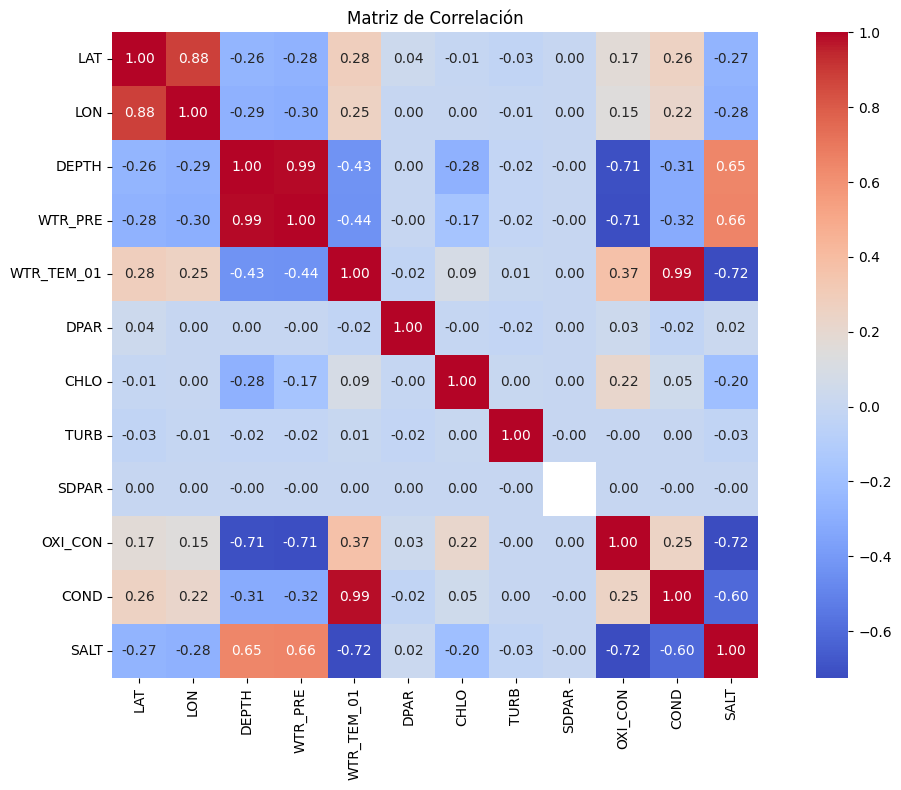

In [ ]:
datos_sin_time_date = datos_sin_negativos.drop(columns=['DATE'], errors='ignore')

# matriz de correlación
correlation_matrix = datos_sin_time_date.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

# Crear csv con datos_socib_clean_complete

In [ ]:
datos_sin_negativos.to_csv("datos_socib_clean_complete_11_09.csv", index=False)